# Analisis de datos de encuesta - Vetzoone

## Objetivos

### General

Identificar los patrones de demanda, barreras tecnológicas y preferencias funcionales de los usuarios potenciales para validar la viabilidad comercial y técnica mediante análisis cuantitativo de datos de encuesta.

### Especificos

1. Segmentación de Usuarios

Clasificar los perfiles de usuarios según su relación con animales, nivel tecnológico y contexto geográfico para definir segmentos de mercado prioritarios.

2. Priorización Funcional

Jerarquizar las funcionalidades más valoradas por cada segmento de usuario para determinar el alcance del MVP y roadmap de desarrollo.

3. Identificación de Barreras

Cuantificar las limitaciones tecnológicas y operativas reportadas por los usuarios para diseñar estrategias de mitigación y adaptación del producto.

4. Validación del Modelo de Negocio

Determinar la disposición de pago y preferencias de monetización por segmento para validar la sostenibilidad financiera del proyecto.

5. Análisis de Adopción Digital

Evaluar el nivel de madurez tecnológica de los usuarios para establecer estrategias de onboarding y experiencia de usuario diferenciadas.

6. Mapeo de Necesidades No Cubiertas

Identificar gaps en soluciones actuales utilizadas por los usuarios para definir ventajas competitivas diferenciadores.

## 1. Carga y Exploración Inicial de Datos

Comenzamos cargando el dataset de la encuesta y exploramos su estructura básica. Importamos las librerías necesarias para el análisis y cargamos los datos desde el archivo CSV para tener una primera vista de la información disponible.

In [37]:
import pandas as pd
import numpy as np

path = "encuestas/encuesta_mayo.csv"
df = pd.read_csv(path)

df.head()

,Marca temporal,Dirección de correo electrónico,¿Cuál es su relación principal con los animales?,"¿Cómo gestiona actualmente la información y los registros relacionados con la salud y el cuidado de los animales bajo su responsabilidad (ya sea como propietario, productor o profesional veterinario)?","¿Cuáles considera que son sus principales desafíos actuales en la gestión de la salud animal, el cuidado de los animales o en su actividad profesional relacionada con ellos? (Seleccione todos los que apliquen)","Considerando su actividad principal relacionada con animales (cuidado personal, producción o práctica profesional), ¿qué nivel de adopción tecnológica diría que tiene actualmente?","¿Qué tan importante considera la capacidad de acceder y gestionar información relevante sobre la salud y manejo de los animales desde dispositivos móviles (teléfonos, tablets)?","Pensando en una plataforma digital integral para la salud y gestión animal, ¿qué funcionalidades consideraría más valiosas o útiles? (Seleccione todas las que correspondan)","Al evaluar una nueva plataforma digital para la gestión de la salud animal, ¿qué factores consideraría más importantes? (Seleccione todos los que correspondan)","Imaginando una aplicación móvil que facilite la gestión de la salud animal y la conexión entre los diferentes usuarios (dueños de animales y veterinarios), ¿qué tan probable es que usted la utilizara si cumpliera con sus principales necesidades?",...,"Independientemente de si es proveedor o usuario de servicios veterinarios, ¿qué aspectos considera más importantes al momento de elegir, ofrecer o interactuar en el ámbito de la salud animal? (Seleccione todas las que apliquen)","¿Cómo suele descubrir nuevos servicios, productos o tecnologías para el cuidado o manejo de sus animales, o para su actividad profesional en el sector? (Seleccione todas las que apliquen)",¿En qué rango de edad se encuentra?,¿Cuál es su situación laboral actual?,¿En qué tipo de localidad reside usted o se ubica su principal operación/actividad con animales?,"Pensando en el lugar donde habitualmente maneja, cuida a sus animales o ejerce su profesión veterinaria, ¿cómo describiría su acceso a internet?",¿Cuánto tiempo dedica aproximadamente al día al uso de aplicaciones móviles en general (no necesariamente relacionadas con animales)?,Qué dispositivos utiliza principalmente para buscar información o gestionar actividades (en general o relacionadas con sus animales/práctica profesional)? (Seleccione todas las que correspondan),¿Qué tan cómodo se siente realizando pagos o transacciones financieras a través de aplicaciones móviles o plataformas en línea?,"¿Hay alguna otra necesidad, desafío particular o funcionalidad que no hayamos mencionado y que usted considere importante o muy útil para una plataforma digital de servicios veterinarios y gestión de salud animal?"
0,22/5/2025 16:52:29,soyeinmariles@gmail.com,Soy dueño/a principalmente de mascotas domésti...,No llevo un registro sistemático o es muy básico,"Seguimiento de tratamientos, vacunas y recorda...",Intermedio (combinamos métodos digitales y tra...,Poco importante,Sistema de agenda y gestión de citas (para sol...,Facilidad de uso y que la interfaz sea intuiti...,Moderadamente probable,...,Experiencia y especialización del profesional/...,Recomendación de mi veterinario/a de confianza...,18-24 años,Estudiante,"Zona urbana (ciudad, población grande)",Conexión de alta velocidad y estable (ej. Fibr...,Más de 4 horas,Smartphone (teléfono inteligente),"Moderadamente cómodo, lo hago ocasionalmente c...",NaN
1,22/5/2025 16:52:56,jsjonathansantos56@gmail.com,Soy dueño/a principalmente de mascotas domésti...,Principalmente con registros físicos en papel ...,"Seguimiento de tratamientos, vacunas y recorda...",Avanzado (utilizamos algunas herramientas digi...,Muy importante,Expediente clínico/de salud digital por animal...,"Seguridad y privacidad de los datos., Compatib...",Moderadamente probable,...,Disponibilidad y rapidez

### Exploración de las columnas originales

Antes de proceder con la limpieza, revisamos todas las columnas del dataset original para entender qué información tenemos disponible. Esto nos ayuda a planificar mejor el renombrado de variables.

In [38]:
cols = df.columns
for col in cols:
    print(col)

Marca temporal
Dirección de correo electrónico
¿Cuál es su relación principal con los animales?
¿Cómo gestiona actualmente la información y los registros relacionados con la salud y el cuidado de los animales bajo su responsabilidad (ya sea como propietario, productor o profesional veterinario)?
¿Cuáles considera que son sus principales desafíos actuales en la gestión de la salud animal, el cuidado de los animales o en su actividad profesional relacionada con ellos? (Seleccione todos los que apliquen)  
Considerando su actividad principal relacionada con animales (cuidado personal, producción o práctica profesional), ¿qué nivel de adopción tecnológica diría que tiene actualmente? 
¿Qué tan importante considera la capacidad de acceder y gestionar información relevante sobre la salud y manejo de los animales desde dispositivos móviles (teléfonos, tablets)? 
Pensando en una plataforma digital integral para la salud y gestión animal, ¿qué funcionalidades consideraría más valiosas o útiles?

### Renombrado de columnas para facilitar el análisis

Para trabajar más eficientemente, renombramos todas las columnas con nombres más cortos y descriptivos. Esto nos permitirá referenciar las variables de manera más sencilla durante todo el análisis.

In [39]:
column_mapping = {
    'Marca temporal': 'timestamp',
    'Dirección de correo electrónico': 'email',
    '¿Cuál es su relación principal con los animales?': 'relacion_animales',
    '¿Cómo gestiona actualmente la información y los registros relacionados con la salud y el cuidado de los animales bajo su responsabilidad (ya sea como propietario, productor o profesional veterinario)?': 'gestion_actual_registros',
    '¿Cuáles considera que son sus principales desafíos actuales en la gestión de la salud animal, el cuidado de los animales o en su actividad profesional relacionada con ellos? (Seleccione todos los que apliquen)': 'desafios_actuales',
    'Considerando su actividad principal relacionada con animales (cuidado personal, producción o práctica profesional), ¿qué nivel de adopción tecnológica diría que tiene actualmente?': 'nivel_adopcion_tecnologica',
    '¿Qué tan importante considera la capacidad de acceder y gestionar información relevante sobre la salud y manejo de los animales desde dispositivos móviles (teléfonos, tablets)?': 'importancia_dispositivos_moviles',
    'Pensando en una plataforma digital integral para la salud y gestión animal, ¿qué funcionalidades consideraría más valiosas o útiles?  (Seleccione todas las que correspondan)': 'funcionalidades_valiosas',
    'Al evaluar una nueva plataforma digital para la gestión de la salud animal, ¿qué factores consideraría más importantes? (Seleccione todos los que correspondan)': 'factores_importantes_evaluacion',
    'Imaginando una aplicación móvil que facilite la gestión de la salud animal y la conexión entre los diferentes usuarios (dueños de animales y veterinarios), ¿qué tan probable es que usted la utilizara si cumpliera con sus principales necesidades?': 'probabilidad_uso_app',
    '¿Cuánto estaría dispuesto/a a pagar mensualmente por una suscripción a una plataforma digital integral con estas características, o qué modelo de pago preferiría?': 'disposicion_pago',
    '¿Utiliza actualmente alguna plataforma digital, software, aplicación específica o incluso grupos en redes sociales para la gestión de la salud de sus animales, o para acceder u ofrecer servicios veterinarios?': 'uso_actual_herramientas_digitales',
    'Si utiliza alguna herramienta o sistema digital para la gestión animal, ¿qué es lo que más valora o le resulta más útil de ella? (Si no utiliza ninguna, puede seleccionar "No aplica")': 'valor_herramientas_actuales',
    '¿Qué le ha frustrado más o qué carencias importantes ha encontrado en aplicaciones, software o servicios digitales para la gestión animal que haya utilizado o evaluado en el pasado? (Seleccione todas las que apliquen. Si no ha utilizado ninguna, puede seleccionar la última opción)': 'frustraciones_carencias',
    'Independientemente de si es proveedor o usuario de servicios veterinarios, ¿qué aspectos considera más importantes al momento de elegir, ofrecer o interactuar en el ámbito de la salud animal? (Seleccione todas las que apliquen)': 'aspectos_importantes_servicios',
    '¿Cómo suele descubrir nuevos servicios, productos o tecnologías para el cuidado o manejo de sus animales, o para su actividad profesional en el sector? (Seleccione todas las que apliquen)': 'descubrimiento_servicios',
    '¿En qué rango de edad se encuentra?': 'rango_edad',
    '¿Cuál es su situación laboral actual?': 'situacion_laboral',
    '¿En qué tipo de localidad reside usted o se ubica su principal operación/actividad con animales?': 'tipo_localidad',
    'Pensando en el lugar donde habitualmente maneja, cuida a sus animales o ejerce su profesión veterinaria, ¿cómo describiría su acceso a internet?': 'acceso_internet',
    '¿Cuánto tiempo dedica aproximadamente al día al uso de aplicaciones móviles en general (no necesariamente relacionadas con animales)?': 'tiempo_uso_apps',
    'Qué dispositivos utiliza principalmente para buscar información o gestionar actividades (en general o relacionadas con sus animales/práctica profesional)? (Seleccione todas las que correspondan)': 'dispositivos_principales',
    '¿Qué tan cómodo se siente realizando pagos o transacciones financieras a través de aplicaciones móviles o plataformas en línea?': 'comodidad_pagos_online',
    '¿Hay alguna otra necesidad, desafío particular o funcionalidad que no hayamos mencionado y que usted considere importante o muy útil para una plataforma digital de servicios veterinarios y gestión de salud animal?': 'otras_necesidades'
}

df.columns = df.columns.str.strip()
df = df.rename(columns=column_mapping)

print("---- Nuevas columnas: ----")
for col in df.columns:
    print(col)
print("--------------------------")

---- Nuevas columnas: ----
timestamp
email
relacion_animales
gestion_actual_registros
desafios_actuales
nivel_adopcion_tecnologica
importancia_dispositivos_moviles
funcionalidades_valiosas
factores_importantes_evaluacion
probabilidad_uso_app
disposicion_pago
uso_actual_herramientas_digitales
valor_herramientas_actuales
frustraciones_carencias
aspectos_importantes_servicios
descubrimiento_servicios
rango_edad
situacion_laboral
tipo_localidad
acceso_internet
tiempo_uso_apps
dispositivos_principales
comodidad_pagos_online
otras_necesidades
--------------------------


## 2. Análisis de Calidad de Datos

Revisamos la completitud de nuestros datos identificando valores faltantes por columna. También convertimos algunas variables categóricas clave a su tipo de dato apropiado y calculamos las frecuencias básicas para entender la distribución de nuestras variables principales.

In [40]:
faltantes = df.isnull().sum().sort_values(ascending=False)
pct_faltantes = (df.isnull().mean() * 100).sort_values(ascending=False)

print("--- Cantidad de valores faltantes por columna: ---")
print(faltantes[faltantes > 0])

print("\n--- Porcentaje de valores faltantes por columna (solo >0%): ---")
print(pct_faltantes[pct_faltantes > 0])

df['relacion_animales'] = df['relacion_animales'].astype('category')
df['gestion_actual_registros'] = df['gestion_actual_registros'].astype('category')
df['nivel_adopcion_tecnologica'] = df['nivel_adopcion_tecnologica'].astype('category')

conteos_relacion_animales = df.groupby('relacion_animales', observed=False).size()
conteos_gestion_actual_registros = df.groupby('gestion_actual_registros', observed=False).size()
conteos_nivel_adopcion_tecnologica = df.groupby('nivel_adopcion_tecnologica', observed=False).size()

print(f"\nConeto: {conteos_relacion_animales} ")
print(f"\nConeto: {conteos_gestion_actual_registros} ")
print(f"\nConeto: {conteos_nivel_adopcion_tecnologica} ")

--- Cantidad de valores faltantes por columna: ---
otras_necesidades    10
dtype: int64

--- Porcentaje de valores faltantes por columna (solo >0%): ---
otras_necesidades    58.823529
dtype: float64

Coneto: relacion_animales
Manejo tanto mascotas domésticas como animales de granja/rancho.                   4
Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.).    12
Soy profesional veterinario                                                        1
dtype: int64 

Coneto: gestion_actual_registros
No llevo un registro sistemático o es muy básico                                     5
Principalmente con registros físicos en papel (cartillas, expedientes, bitácoras)    8
Una combinación de métodos digitales y en papel                                      1
Utilizando hojas de cálculo (Excel, Google Sheets, etc.)                             3
dtype: int64 

Coneto: nivel_adopcion_tecnologica
Avanzado (utilizamos algunas herramientas digitales clave)               

## 3. Análisis de Segmentación de Usuarios

### 3.1 Relación principal con animales

Creamos visualizaciones para entender la composición de nuestros encuestados según su relación principal con los animales. Esta segmentación es fundamental para definir nuestros grupos objetivo.

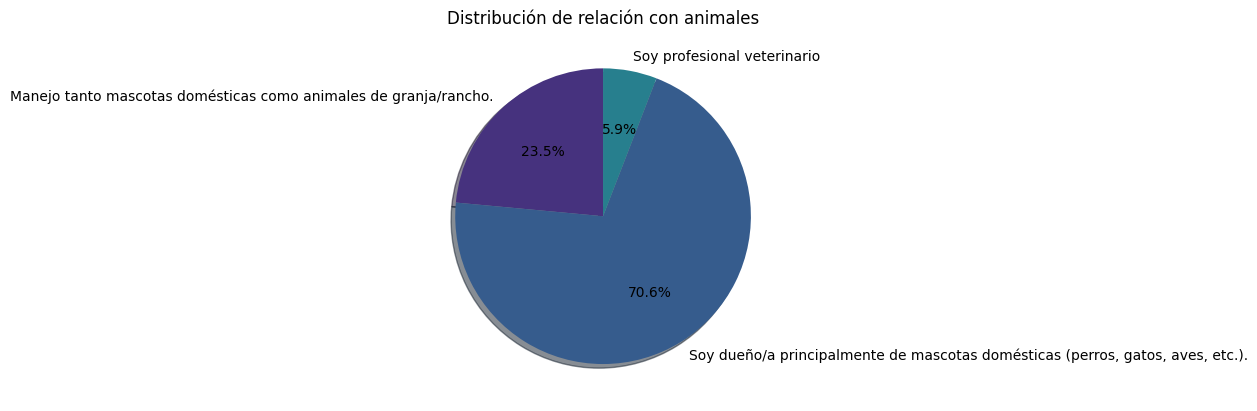

In [41]:
import matplotlib.pyplot as plt

conteos_relacion_animales.plot.pie(
    autopct='%.1f%%',     
    shadow=True,           
    startangle=90,        
    legend=False           
)
plt.ylabel('')             
plt.title('Distribución de relación con animales')
plt.show()

### 3.2 Métodos actuales de gestión de registros

Analizamos cómo gestionan actualmente los encuestados la información de salud animal. Esto nos ayuda a identificar las oportunidades de digitalización y los hábitos actuales que debemos considerar.

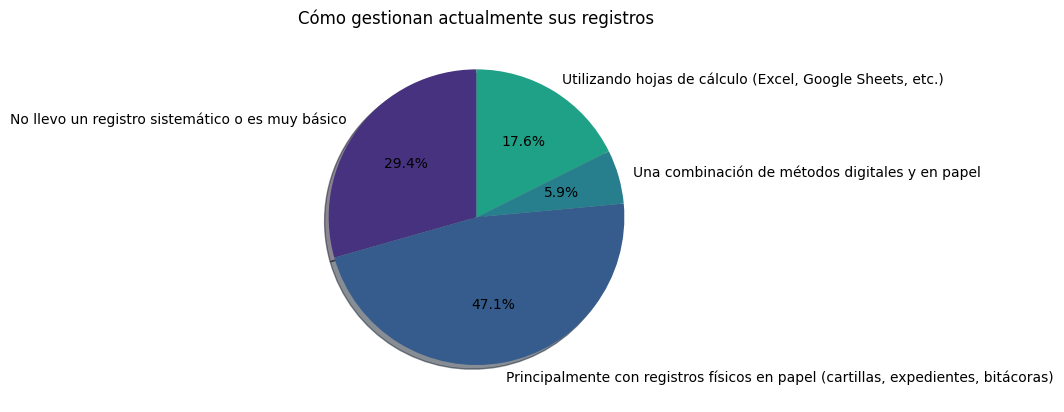

In [42]:
conteos_gestion_actual_registros.plot.pie(
    autopct='%.1f%%',
    shadow=True,
    startangle=90,
    legend=False
)
plt.ylabel('')
plt.title('Cómo gestionan actualmente sus registros')
plt.show()


### 3.3 Nivel de adopción tecnológica actual

Evaluamos el nivel de madurez tecnológica de nuestros encuestados. Esta información es crucial para diseñar estrategias de onboarding diferenciadas y entender las barreras tecnológicas que enfrentamos.

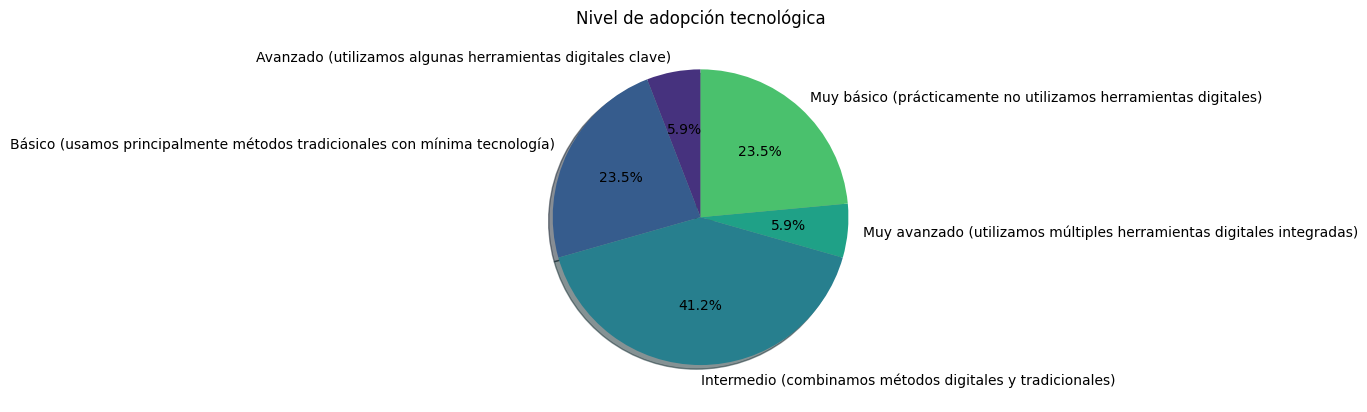

In [43]:
conteos_nivel_adopcion_tecnologica.plot.pie(
    autopct='%.1f%%',
    shadow=True,
    startangle=90,
    legend=False
)
plt.ylabel('')
plt.title('Nivel de adopción tecnológica')
plt.show()

## 4. Análisis Cuantitativo de Variables Clave

### 4.1 Importancia de dispositivos móviles

Analizamos cuantitativamente la importancia que los usuarios asignan a los dispositivos móviles para gestionar información de salud animal. Seguimos el enfoque del notebook e1 para crear mapeos numéricos que nos permitan calcular métricas estadísticas.

In [44]:
def mapear_importancia_dispositivos(opcion):
    if opcion == "Nada importante":
        return 0
    elif opcion == "Poco importante":
        return 1
    elif opcion == "Moderadamente importante":
        return 2
    elif opcion == "Muy importante":
        return 3
    elif opcion == "Extremadamente importante":
        return 4
    else:
        return None

print("Opciones disponibles para importancia de dispositivos móviles:")
for opcion in df['importancia_dispositivos_moviles'].unique():
    print(f"- {opcion}")

df['importancia_dispositivos_moviles_num'] = df['importancia_dispositivos_moviles'].apply(mapear_importancia_dispositivos)

media_importancia = df['importancia_dispositivos_moviles_num'].mean()
nivel_porcentual = (media_importancia / 4) * 100

print(f"\nMedia de importancia (0-4): {media_importancia:.3f}")
print(f"Nivel porcentual de importancia: {nivel_porcentual:.1f}%")

Opciones disponibles para importancia de dispositivos móviles:
- Poco importante
- Muy importante
- Extremadamente importante
- Moderadamente importante
- Nada importante

Media de importancia (0-4): 2.529
Nivel porcentual de importancia: 63.2%


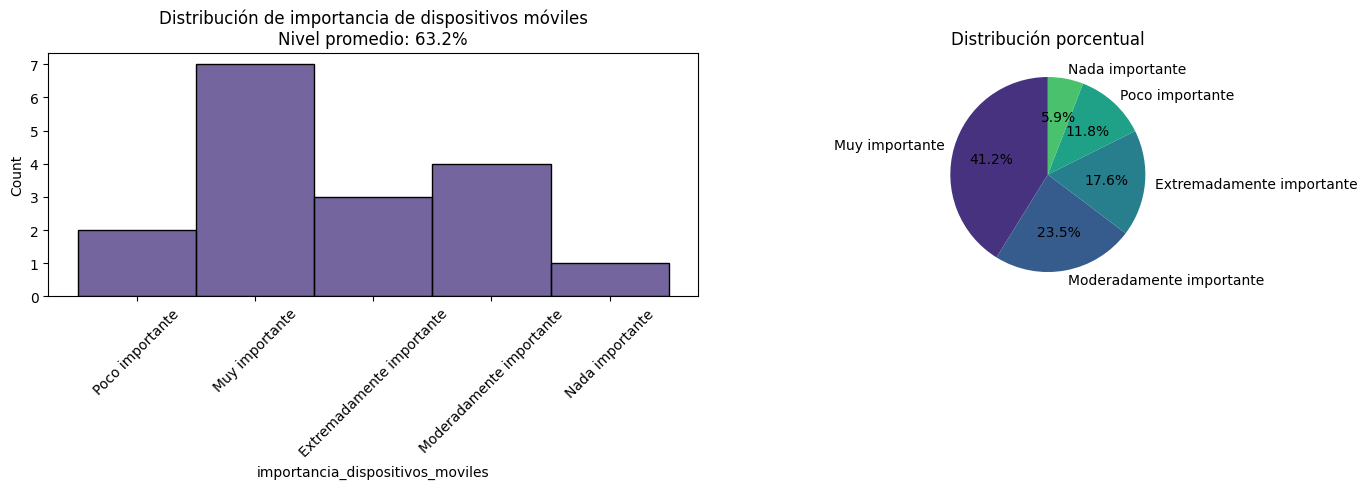


Distribución de respuestas:
Muy importante: 7 (41.2%)
Moderadamente importante: 4 (23.5%)
Extremadamente importante: 3 (17.6%)
Poco importante: 2 (11.8%)
Nada importante: 1 (5.9%)


In [45]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='importancia_dispositivos_moviles', ax=ax1)
ax1.set_title(f'Distribución de importancia de dispositivos móviles\nNivel promedio: {nivel_porcentual:.1f}%')
ax1.tick_params(axis='x', rotation=45)

conteos_importancia = df['importancia_dispositivos_moviles'].value_counts()
ax2.pie(conteos_importancia.values, labels=conteos_importancia.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución porcentual')

plt.tight_layout()
plt.show()

print("\nDistribución de respuestas:")
for opcion, count in conteos_importancia.items():
    porcentaje = (count / len(df)) * 100
    print(f"{opcion}: {count} ({porcentaje:.1f}%)")

## 5. Segmentación de Usuarios (Objetivo Específico 1)

### 5.1 Matriz de segmentación: Relación con animales vs Adopción tecnológica

Creamos una matriz cruzada para identificar los segmentos de mercado prioritarios basados en la relación con animales y el nivel de adopción tecnológica.

In [46]:
segmentacion = pd.crosstab(df['relacion_animales'], df['nivel_adopcion_tecnologica'], margins=True)
segmentacion_pct = pd.crosstab(df['relacion_animales'], df['nivel_adopcion_tecnologica'], normalize='index') * 100

segmentacion_clean = segmentacion.iloc[:-1, :-1]  # Sin totales
segmentacion_pct_clean = segmentacion_pct.iloc[:, :]

print("=== RESUMEN DE SEGMENTACIÓN ===")
print(f"Total de encuestados: {len(df)}")
print(f"Segmentos identificados: {segmentacion_clean.shape[0]} x {segmentacion_clean.shape[1]} = {segmentacion_clean.shape[0] * segmentacion_clean.shape[1]}")
print("\nDistribución por segmento:")
print(segmentacion_clean)

=== RESUMEN DE SEGMENTACIÓN ===
Total de encuestados: 17
Segmentos identificados: 3 x 5 = 15

Distribución por segmento:
nivel_adopcion_tecnologica                          Avanzado (utilizamos algunas herramientas digitales clave)  \
relacion_animales                                                                                                
Manejo tanto mascotas domésticas como animales ...                                                  0            
Soy dueño/a principalmente de mascotas doméstic...                                                  1            
Soy profesional veterinario                                                                         0            

nivel_adopcion_tecnologica                          Básico (usamos principalmente métodos tradicionales con mínima tecnología)  \
relacion_animales                                                                                                                
Manejo tanto mascotas domésticas como animales .

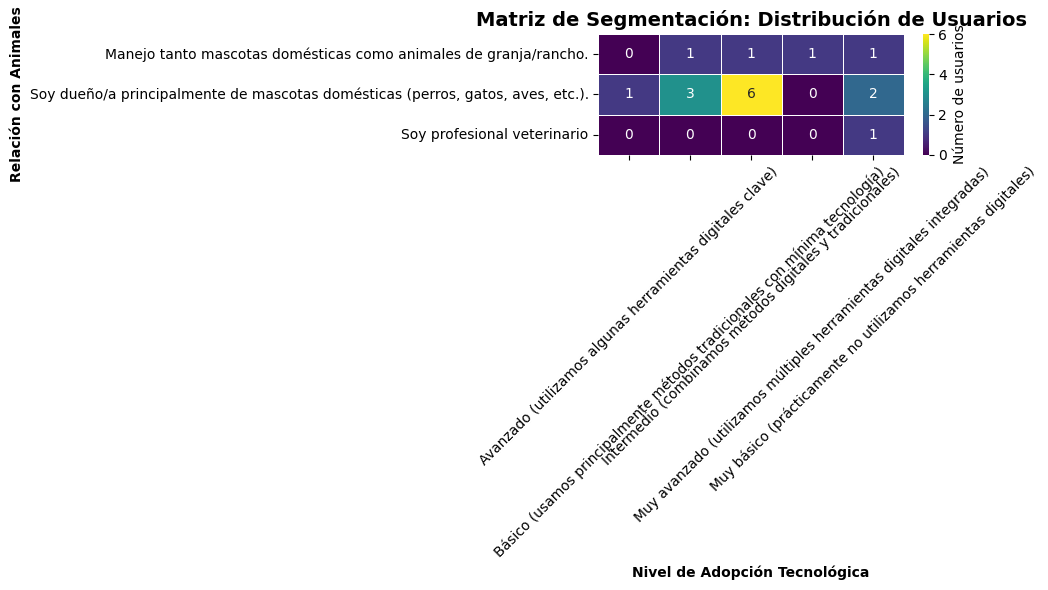

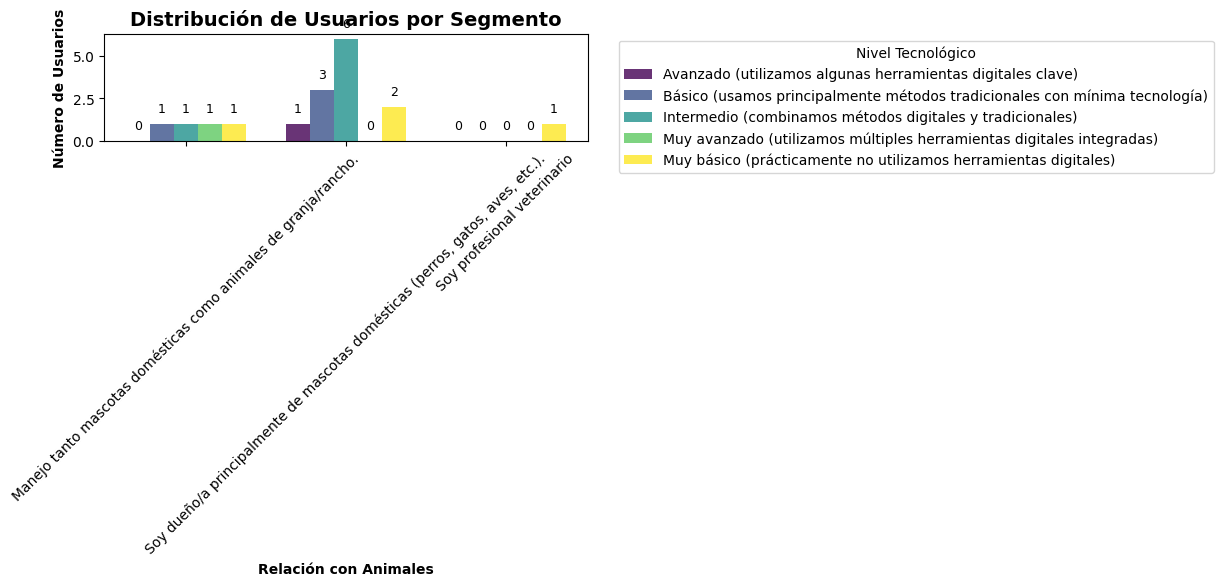

C:\Users\maste\AppData\Local\Temp\ipykernel_20756\508277228.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(j, bottom[j] + v/2, str(v),


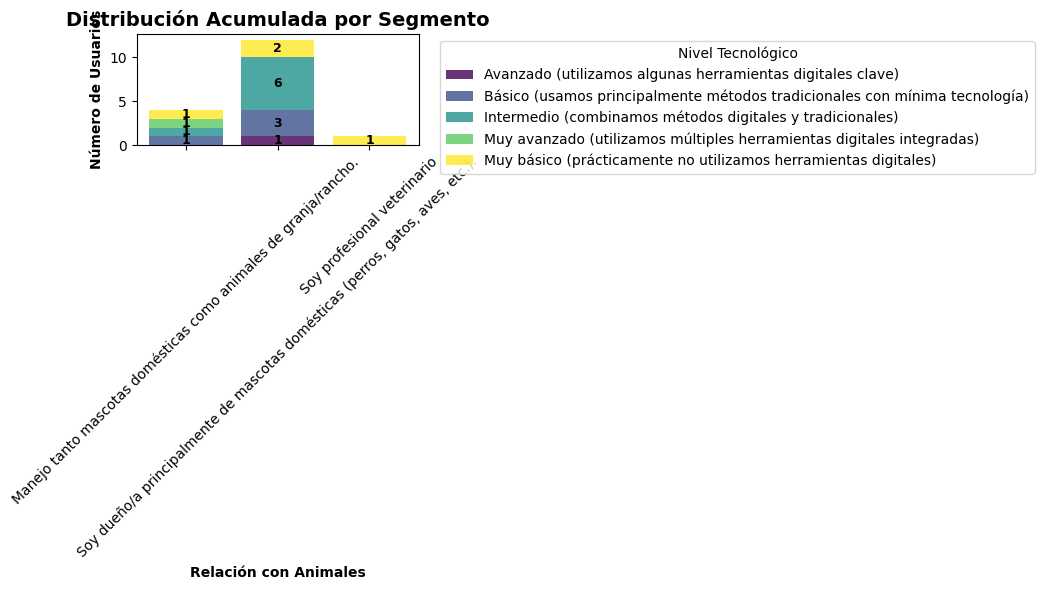

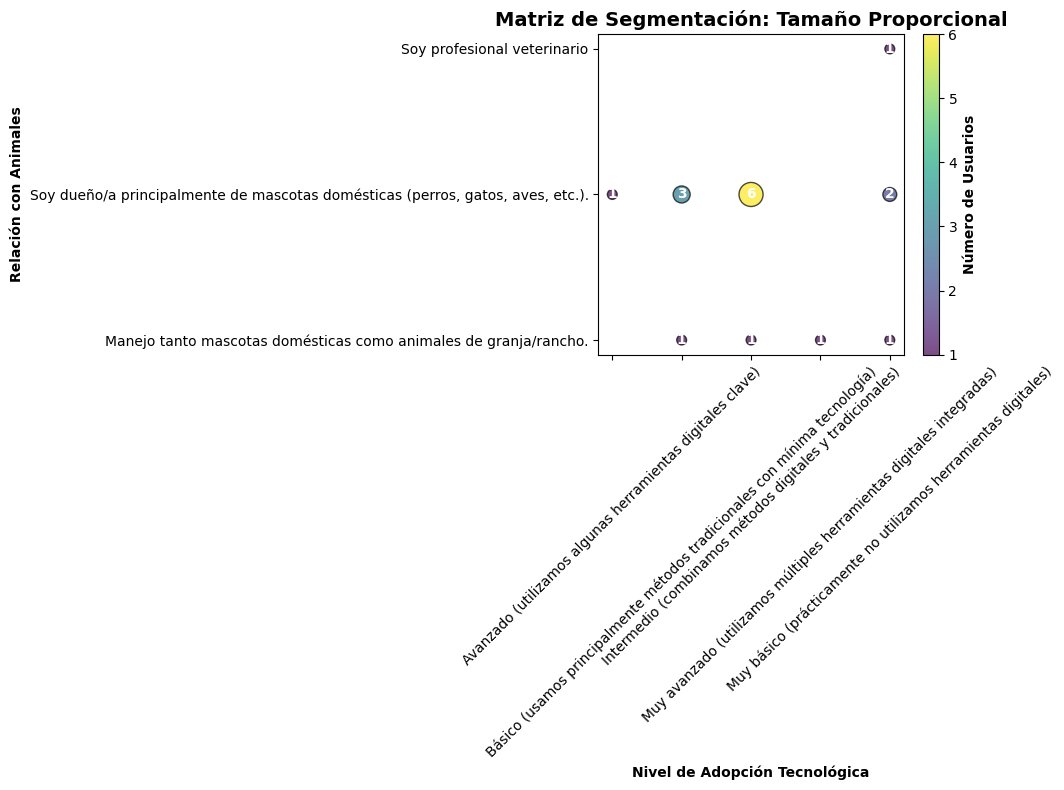

C:\Users\maste\AppData\Local\Temp\ipykernel_20756\508277228.py:147: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


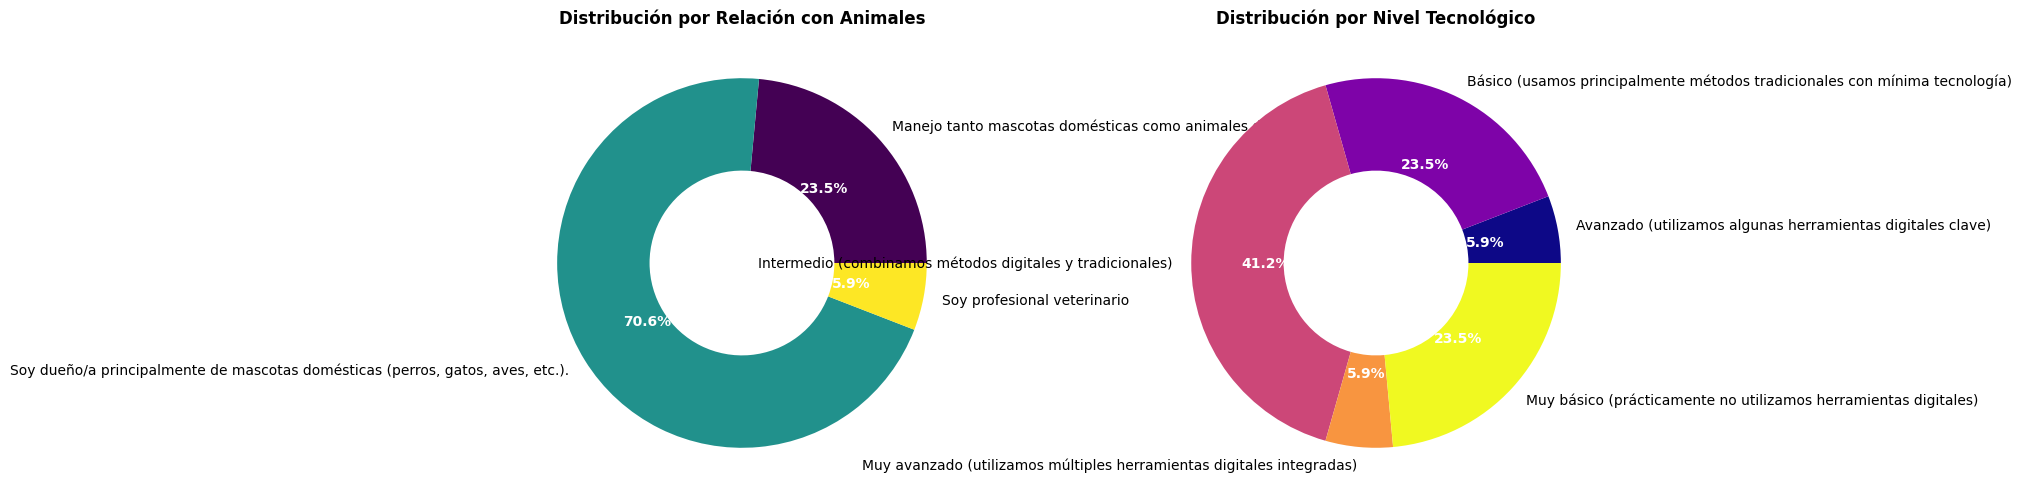

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('default')
sns.set_palette("viridis")

segmentacion_clean = segmentacion.iloc[:-1, :-1]

segmentacion_melted = segmentacion_clean.reset_index().melt(
    id_vars=['relacion_animales'], 
    var_name='nivel_tecnologico', 
    value_name='cantidad'
)

# 1. HEATMAP - Matriz de segmentación
plt.figure(figsize=(10, 6))
sns.heatmap(
    segmentacion_clean, 
    annot=True, 
    fmt='d', 
    cmap='viridis',
    cbar_kws={'label': 'Número de usuarios'},
    linewidths=0.5,
    linecolor='white'
)
plt.title('Matriz de Segmentación: Distribución de Usuarios', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Adopción Tecnológica', fontweight='bold')
plt.ylabel('Relación con Animales', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. GRÁFICO DE BARRAS AGRUPADAS
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(segmentacion_clean.index))
width = 0.15
colors = plt.cm.viridis(np.linspace(0, 1, len(segmentacion_clean.columns)))

for i, col in enumerate(segmentacion_clean.columns):
    ax.bar(x_pos + i*width, segmentacion_clean[col], width, 
           label=col, color=colors[i], alpha=0.8)
    
    for j, v in enumerate(segmentacion_clean[col]):
        ax.text(x_pos[j] + i*width, v + 0.5, str(v), 
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Relación con Animales', fontweight='bold')
ax.set_ylabel('Número de Usuarios', fontweight='bold')
ax.set_title('Distribución de Usuarios por Segmento', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos + width * (len(segmentacion_clean.columns)-1)/2)
ax.set_xticklabels(segmentacion_clean.index, rotation=45)
ax.legend(title='Nivel Tecnológico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. GRÁFICO DE BARRAS APILADAS
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(segmentacion_clean.index))
colors = plt.cm.viridis(np.linspace(0, 1, len(segmentacion_clean.columns)))

for i, col in enumerate(segmentacion_clean.columns):
    values = segmentacion_clean[col]
    ax.bar(segmentacion_clean.index, values, bottom=bottom, 
           label=col, color=colors[i], alpha=0.8)
    
    for j, v in enumerate(values):
        if v > 0:  # Solo mostrar si hay valor
            ax.text(j, bottom[j] + v/2, str(v), 
                    ha='center', va='center', fontweight='bold', fontsize=9)
    
    bottom += values

ax.set_xlabel('Relación con Animales', fontweight='bold')
ax.set_ylabel('Número de Usuarios', fontweight='bold')
ax.set_title('Distribución Acumulada por Segmento', fontsize=14, fontweight='bold')
ax.legend(title='Nivel Tecnológico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. SCATTER PLOT con tamaños proporcionales
fig, ax = plt.subplots(figsize=(10, 8))

x_coords = []
y_coords = []
sizes = []
colors_list = []

for i, relacion in enumerate(segmentacion_clean.index):
    for j, tecnologia in enumerate(segmentacion_clean.columns):
        valor = segmentacion_clean.iloc[i, j]
        if valor > 0:
            x_coords.append(j)
            y_coords.append(i)
            sizes.append(valor * 50)  # Escalar el tamaño
            colors_list.append(valor)

scatter = ax.scatter(x_coords, y_coords, s=sizes, c=colors_list, 
                    cmap='viridis', alpha=0.7, edgecolors='black', linewidth=1)

ax.set_xticks(range(len(segmentacion_clean.columns)))
ax.set_xticklabels(segmentacion_clean.columns, rotation=45)
ax.set_yticks(range(len(segmentacion_clean.index)))
ax.set_yticklabels(segmentacion_clean.index)

ax.set_xlabel('Nivel de Adopción Tecnológica', fontweight='bold')
ax.set_ylabel('Relación con Animales', fontweight='bold')
ax.set_title('Matriz de Segmentación: Tamaño Proporcional', fontsize=14, fontweight='bold')

cbar = plt.colorbar(scatter)
cbar.set_label('Número de Usuarios', fontweight='bold')

for i, (x, y, val) in enumerate(zip(x_coords, y_coords, colors_list)):
    ax.text(x, y, str(int(val)), ha='center', va='center', 
            fontweight='bold', fontsize=10, color='white')

plt.tight_layout()
plt.show()

# 5. GRÁFICO DE DONA (PIE CHART) por categoría principal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

relacion_totales = segmentacion_clean.sum(axis=1)
colors1 = plt.cm.viridis(np.linspace(0, 1, len(relacion_totales)))

wedges1, texts1, autotexts1 = ax1.pie(relacion_totales, labels=relacion_totales.index, 
                                      autopct='%1.1f%%', colors=colors1,
                                      wedgeprops=dict(width=0.5))
ax1.set_title('Distribución por Relación con Animales', fontweight='bold')

tecnologia_totales = segmentacion_clean.sum(axis=0)
colors2 = plt.cm.plasma(np.linspace(0, 1, len(tecnologia_totales)))

wedges2, texts2, autotexts2 = ax2.pie(tecnologia_totales, labels=tecnologia_totales.index,
                                      autopct='%1.1f%%', colors=colors2,
                                      wedgeprops=dict(width=0.5))
ax2.set_title('Distribución por Nivel Tecnológico', fontweight='bold')

for autotext in autotexts1 + autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [48]:
print("=== ANÁLISIS DE SEGMENTOS PRIORITARIOS ===\n")

segmentos_detalle = []
for relacion in df['relacion_animales'].unique():
    for tecnologia in df['nivel_adopcion_tecnologica'].unique():
        subset = df[(df['relacion_animales'] == relacion) & (df['nivel_adopcion_tecnologica'] == tecnologia)]
        if len(subset) > 0:
            importancia_movil_promedio = subset['importancia_dispositivos_moviles_num'].mean()
            
            segmentos_detalle.append({
                'relacion_animales': relacion,
                'nivel_tecnologico': tecnologia,
                'cantidad_usuarios': len(subset),
                'porcentaje_total': (len(subset) / len(df)) * 100,
                'importancia_movil_promedio': importancia_movil_promedio,
                'importancia_movil_pct': (importancia_movil_promedio / 4) * 100
            })

segmentos_df = pd.DataFrame(segmentos_detalle)
segmentos_df = segmentos_df.sort_values('cantidad_usuarios', ascending=False)

print("Segmentos ordenados por tamaño:")
print(segmentos_df.round(2))

print("\n=== TOP 3 SEGMENTOS PRIORITARIOS ===\n")
for i, (idx, segmento) in enumerate(segmentos_df.head(3).iterrows()):
    print(f"{i+1}. {segmento['relacion_animales']} + {segmento['nivel_tecnologico']}")
    print(f"   - Usuarios: {segmento['cantidad_usuarios']} ({segmento['porcentaje_total']:.1f}% del total)")
    print(f"   - Importancia dispositivos móviles: {segmento['importancia_movil_pct']:.1f}%")
    print()

=== ANÁLISIS DE SEGMENTOS PRIORITARIOS ===

Segmentos ordenados por tamaño:
                                   relacion_animales  \
0  Soy dueño/a principalmente de mascotas domésti...   
2  Soy dueño/a principalmente de mascotas domésti...   
3  Soy dueño/a principalmente de mascotas domésti...   
1  Soy dueño/a principalmente de mascotas domésti...   
4  Manejo tanto mascotas domésticas como animales...   
5  Manejo tanto mascotas domésticas como animales...   
6  Manejo tanto mascotas domésticas como animales...   
7  Manejo tanto mascotas domésticas como animales...   
8                        Soy profesional veterinario   

                                   nivel_tecnologico  cantidad_usuarios  \
0  Intermedio (combinamos métodos digitales y tra...                  6   
2  Básico (usamos principalmente métodos tradicio...                  3   
3  Muy básico (prácticamente no utilizamos herram...                  2   
1  Avanzado (utilizamos algunas herramientas digi...           

## 6. Priorización Funcional (Objetivo Específico 2)

### 6.1 Análisis de funcionalidades más valoradas

Analizamos las funcionalidades que los usuarios consideran más valiosas para jerarquizar el desarrollo del MVP. Procesamos las respuestas de opción múltiple para identificar las prioridades.

In [49]:
funcionalidades_mapping = {
    "Expediente clínico/de salud digital por animal, completo y accesible 24/7.": "FUNC_001",
    "Sistema de agenda y gestión de citas (para solicitar o administrar).": "FUNC_002", 
    "Gestión de inventario (medicamentos, insumos, alimentos, etc.).": "FUNC_003",
    "Módulo de facturación, gestión financiera o historial de pagos.": "FUNC_004",
    "Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios).": "FUNC_005",
    "Recordatorios automáticos (vacunas, tratamientos, citas, seguimientos, etc.).": "FUNC_006",
    "Acceso y/o gestión de imágenes diagnósticas (radiografías, ecografías, etc.).": "FUNC_007",
    "Prescripción digital de medicamentos (generar o recibir).": "FUNC_008",
    "Herramientas de apoyo basadas en inteligencia artificial (para diagnóstico, información, alertas).": "FUNC_009",
    "Acceso a consejos de salud, bienestar personalizados o información técnica actualizada.": "FUNC_010",
    "Facilidad para compartir información de forma segura con otros usuarios o profesionales (con los permisos adecuados).": "FUNC_011",
    "Posibilidad de uso sin conexión a internet (funcionalidad offline).": "FUNC_012",
    "herramientas de apoyo basadas de acuerdo a especie animal": "FUNC_013"
}

print("=== DICCIONARIO DE FUNCIONALIDADES A COMPLETAR ===")
print("- Key: Texto exacto de cada opción de funcionalidad")
print("- Value: Código único (ej: FUNC_001, FUNC_002, etc.)")
print("\nOpciones únicas encontradas en los datos:")
print("=" * 60)

respuestas_unicas = set()
for respuesta in df['funcionalidades_valiosas'].dropna():
    respuestas_unicas.add(str(respuesta))

for i, respuesta in enumerate(sorted(respuestas_unicas), 1):
    print(f"{i:2d}. {respuesta}")
    print()

print("=" * 60)

def procesar_respuestas_con_mapeo(serie_respuestas, mapping_dict):
    """
    Procesa respuestas múltiples usando un diccionario de mapeo
    para evitar problemas con comas en las opciones.
    """
    if not mapping_dict:
        print("ERROR: El diccionario de mapeo está vacío. Complétalo primero.")
        return [], {}, {}
    
    respuestas_codificadas = []
    
    for respuesta_original in serie_respuestas:
        respuesta_str = str(respuesta_original)
        respuesta_procesada = respuesta_str
        
        for opcion_texto, codigo in mapping_dict.items():
            if opcion_texto in respuesta_procesada:
                respuesta_procesada = respuesta_procesada.replace(opcion_texto, codigo)
        
        codigos = [codigo.strip() for codigo in respuesta_procesada.split(',')]
        respuestas_codificadas.extend(codigos)
    
    from collections import Counter
    conteo_codigos = Counter(respuestas_codificadas)
    
    mapeo_inverso = {v: k for k, v in mapping_dict.items()}
    
    return respuestas_codificadas, conteo_codigos, mapeo_inverso

=== DICCIONARIO DE FUNCIONALIDADES A COMPLETAR ===
- Key: Texto exacto de cada opción de funcionalidad
- Value: Código único (ej: FUNC_001, FUNC_002, etc.)

Opciones únicas encontradas en los datos:
 1. Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios).

 2. Expediente clínico/de salud digital por animal, completo y accesible 24/7.

 3. Expediente clínico/de salud digital por animal, completo y accesible 24/7., Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios).

 4. Expediente clínico/de salud digital por animal, completo y accesible 24/7., Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios)., Recordatorios automáticos (vacunas, tratamientos, citas, seguimientos, etc.)., Acceso a consejos de salud, bienestar personalizados o información técnica actualizada.

 5. Expediente clíni

In [50]:
funcionalidades_series = df['funcionalidades_valiosas'].dropna()

if funcionalidades_mapping:
    print("Procesando con mapeo seguro...")
    respuestas_codificadas, conteo_codigos, mapeo_inverso = procesar_respuestas_con_mapeo(
        funcionalidades_series, funcionalidades_mapping
    )
    
    funcionalidades_df = pd.DataFrame([
        {
            'funcionalidad': mapeo_inverso.get(codigo, codigo),  # Usar texto original si existe
            'menciones': count, 
            'porcentaje': (count/len(df))*100
        }
        for codigo, count in conteo_codigos.most_common()
        if codigo in mapeo_inverso  # Solo incluir códigos válidos
    ])
    
else:
    print("Usando método básico (puede tener errores con comas)...")
    funcionalidades_individuales = []
    for respuesta in funcionalidades_series:
        funciones = [func.strip() for func in str(respuesta).split(',')]
        funcionalidades_individuales.extend(funciones)
    
    from collections import Counter
    conteo_funcionalidades = Counter(funcionalidades_individuales)
    
    funcionalidades_df = pd.DataFrame([
        {'funcionalidad': func, 'menciones': count, 'porcentaje': (count/len(df))*100}
        for func, count in conteo_funcionalidades.most_common()
    ])

print("=== RANKING DE FUNCIONALIDADES VALORADAS ===\n")
for i, row in funcionalidades_df.iterrows():
    print(f"{i+1:2d}. {row['funcionalidad'][:60]}{'...' if len(row['funcionalidad']) > 60 else ''}")
    print(f"     Menciones: {row['menciones']} ({row['porcentaje']:.1f}% de encuestados)")
    print()

Procesando con mapeo seguro...
=== RANKING DE FUNCIONALIDADES VALORADAS ===

 1. Expediente clínico/de salud digital por animal, completo y a...
     Menciones: 10 (58.8% de encuestados)

 2. Sistema de agenda y gestión de citas (para solicitar o admin...
     Menciones: 8 (47.1% de encuestados)

 3. Recordatorios automáticos (vacunas, tratamientos, citas, seg...
     Menciones: 7 (41.2% de encuestados)

 4. Acceso a consejos de salud, bienestar personalizados o infor...
     Menciones: 7 (41.2% de encuestados)

 5. Posibilidad de uso sin conexión a internet (funcionalidad of...
     Menciones: 7 (41.2% de encuestados)

 6. Facilidad para compartir información de forma segura con otr...
     Menciones: 6 (35.3% de encuestados)

 7. Herramientas de apoyo basadas en inteligencia artificial (pa...
     Menciones: 5 (29.4% de encuestados)

 8. Canales de comunicación directa (chat, notificaciones) entre...
     Menciones: 5 (29.4% de encuestados)

 9. Gestión de inventario (medicamentos, i

C:\Users\maste\AppData\Local\Temp\ipykernel_20756\2489195567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_funcionalidades, y='funcionalidad', x='porcentaje', palette='viridis')
C:\Users\maste\AppData\Local\Temp\ipykernel_20756\2489195567.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


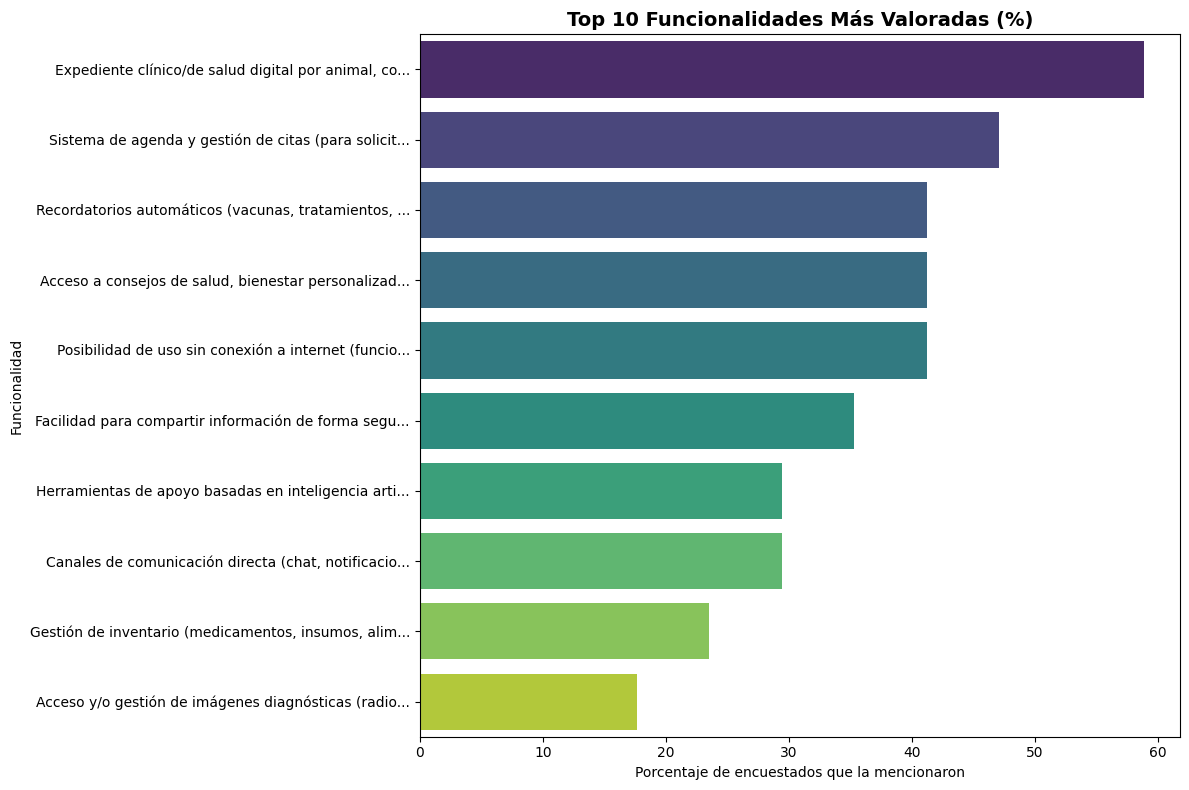


Total de funcionalidades únicas mencionadas: 13
Funcionalidades con >20% de menciones: 9


In [51]:
top_funcionalidades = funcionalidades_df.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_funcionalidades, y='funcionalidad', x='porcentaje', palette='viridis')
plt.title('Top 10 Funcionalidades Más Valoradas (%)', fontsize=14, fontweight='bold')
plt.xlabel('Porcentaje de encuestados que la mencionaron')
plt.ylabel('Funcionalidad')

ax = plt.gca()
labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 50 else label.get_text() 
          for label in ax.get_yticklabels()]
ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

print(f"\nTotal de funcionalidades únicas mencionadas: {len(funcionalidades_df)}")
print(f"Funcionalidades con >20% de menciones: {len(funcionalidades_df[funcionalidades_df['porcentaje'] > 20])}")

In [52]:
def analizar_funcionalidades_por_segmento(df, columna_segmento, mapping_dict):
    """
    Analiza funcionalidades por segmento usando mapeo seguro
    """
    print(f"=== ANÁLISIS DE FUNCIONALIDADES POR {columna_segmento.upper()} ===\n")
    
    for segmento in df[columna_segmento].unique():
        print(f"\n--- {segmento} ---")
        subset = df[df[columna_segmento] == segmento]
        
        if mapping_dict:
            segmento_series = subset['funcionalidades_valiosas'].dropna()
            if len(segmento_series) > 0:
                _, conteo_codigos, mapeo_inverso = procesar_respuestas_con_mapeo(
                    segmento_series, mapping_dict
                )
                
                print(f"Total usuarios en segmento: {len(subset)}")
                print("Top 5 funcionalidades:")
                
                for i, (codigo, count) in enumerate(conteo_codigos.most_common(5)):
                    if codigo in mapeo_inverso:
                        func_texto = mapeo_inverso[codigo]
                        porcentaje = (count / len(subset)) * 100
                        print(f"  {i+1}. {func_texto[:45]}{'...' if len(func_texto) > 45 else ''} ({porcentaje:.1f}%)")
            else:
                print("  No hay datos de funcionalidades para este segmento")
        else:
            func_segmento = []
            for respuesta in subset['funcionalidades_valiosas'].dropna():
                funciones = [func.strip() for func in str(respuesta).split(',')]
                func_segmento.extend(funciones)
            
            conteo_segmento = Counter(func_segmento)
            print(f"Total usuarios en segmento: {len(subset)}")
            print("Top 5 funcionalidades:")
            
            for i, (func, count) in enumerate(conteo_segmento.most_common(5)):
                porcentaje = (count / len(subset)) * 100
                print(f"  {i+1}. {func[:45]}{'...' if len(func) > 45 else ''} ({porcentaje:.1f}%)")
        print()

analizar_funcionalidades_por_segmento(df, 'relacion_animales', funcionalidades_mapping)

=== ANÁLISIS DE FUNCIONALIDADES POR RELACION_ANIMALES ===


--- Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.). ---
Total usuarios en segmento: 12
Top 5 funcionalidades:
  1. Expediente clínico/de salud digital por anima... (41.7%)
  2. Sistema de agenda y gestión de citas (para so... (33.3%)
  3. Canales de comunicación directa (chat, notifi... (33.3%)
  4. Acceso a consejos de salud, bienestar persona... (33.3%)
  5. Posibilidad de uso sin conexión a internet (f... (33.3%)


--- Manejo tanto mascotas domésticas como animales de granja/rancho. ---
Total usuarios en segmento: 4
Top 5 funcionalidades:
  1. Expediente clínico/de salud digital por anima... (100.0%)
  2. Sistema de agenda y gestión de citas (para so... (75.0%)
  3. Recordatorios automáticos (vacunas, tratamien... (75.0%)
  4. Facilidad para compartir información de forma... (75.0%)
  5. Herramientas de apoyo basadas en inteligencia... (50.0%)


--- Soy profesional veterinario ---
Total usuari

In [53]:
from collections import Counter

print("=== ANÁLISIS DE FUNCIONALIDADES POR SEGMENTO ===\n")

for relacion in df['relacion_animales'].unique():
    print(f"\n--- {relacion} ---")
    subset = df[df['relacion_animales'] == relacion]
    
    func_segmento = []
    for respuesta in subset['funcionalidades_valiosas'].dropna():
        funciones = [func.strip() for func in str(respuesta).split(',')]
        func_segmento.extend(funciones)
    
    conteo_segmento = Counter(func_segmento)
    print(f"Total usuarios en segmento: {len(subset)}")
    print("Top 5 funcionalidades:")
    
    for i, (func, count) in enumerate(conteo_segmento.most_common(5)):
        porcentaje = (count / len(subset)) * 100
        print(f"  {i+1}. {func[:45]}{'...' if len(func) > 45 else ''} ({porcentaje:.1f}%)")
    print()

=== ANÁLISIS DE FUNCIONALIDADES POR SEGMENTO ===


--- Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.). ---
Total usuarios en segmento: 12
Top 5 funcionalidades:
  1. etc.). (50.0%)
  2. Expediente clínico/de salud digital por anima... (41.7%)
  3. completo y accesible 24/7. (41.7%)
  4. Sistema de agenda y gestión de citas (para so... (33.3%)
  5. Canales de comunicación directa (chat (33.3%)


--- Manejo tanto mascotas domésticas como animales de granja/rancho. ---
Total usuarios en segmento: 4
Top 5 funcionalidades:
  1. etc.). (125.0%)
  2. Expediente clínico/de salud digital por anima... (100.0%)
  3. completo y accesible 24/7. (100.0%)
  4. Sistema de agenda y gestión de citas (para so... (75.0%)
  5. Recordatorios automáticos (vacunas (75.0%)


--- Soy profesional veterinario ---
Total usuarios en segmento: 1
Top 5 funcionalidades:
  1. etc.). (300.0%)
  2. Expediente clínico/de salud digital por anima... (100.0%)
  3. completo y accesible 24/7. (10

### 6.2 Definición del MVP y Roadmap

Basado en el análisis de funcionalidades y segmentos, definimos las prioridades para el desarrollo del MVP.

In [54]:
print("=== MVP Y ROADMAP ===\n")

if 'funcionalidades_df' in locals() and len(funcionalidades_df) > 0:
    func_mvp = funcionalidades_df[funcionalidades_df['porcentaje'] > 30]
    print("FUNCIONALIDADES CORE PARA MVP (>30% de usuarios):")
    if len(func_mvp) > 0:
        for i, row in func_mvp.iterrows():
            print(f"✓ {row['funcionalidad']} ({row['porcentaje']:.1f}%)")
    else:
        print("  No hay funcionalidades con >30% de menciones")

    print("\n" + "="*50)

    func_v2 = funcionalidades_df[(funcionalidades_df['porcentaje'] >= 15) & (funcionalidades_df['porcentaje'] <= 30)]
    print("\nFUNCIONALIDADES PARA V2.0 (15-30% de usuarios):")
    if len(func_v2) > 0:
        for i, row in func_v2.iterrows():
            print(f"○ {row['funcionalidad']} ({row['porcentaje']:.1f}%)")
    else:
        print("  No hay funcionalidades en este rango")

    print("\n" + "="*50)

    print("\nSEGMENTOS PRIORITARIOS PARA FOCALIZACIÓN INICIAL:")
    for i, (idx, segmento) in enumerate(segmentos_df.head(3).iterrows()):
        print(f"{i+1}. {segmento['relacion_animales']} con {segmento['nivel_tecnologico']}")
        print(f"   → {segmento['cantidad_usuarios']} usuarios ({segmento['porcentaje_total']:.1f}% del mercado)")
        print(f"   → Interés en móviles: {segmento['importancia_movil_pct']:.1f}%")

    print("\n" + "="*50)
    print("\nCONCLUSIONES CLAVE:")
    print(f"• Total de funcionalidades identificadas: {len(funcionalidades_df)}")
    print(f"• Funcionalidades core para MVP: {len(func_mvp)}")
    print(f"• Segmentos prioritarios identificados: 3")
    print(f"• Cobertura de segmentos top 3: {segmentos_df.head(3)['porcentaje_total'].sum():.1f}% del mercado")
    
    if funcionalidades_mapping:
        print(f"• Procesamiento: Mapeo seguro aplicado ✓")
    else:
        print(f"• Procesamiento: Método básico (completar mapeo recomendado)")
        
else:
    print("ERROR: No se han procesado las funcionalidades aún.")
    print("Ejecuta primero las celdas anteriores.")

=== MVP Y ROADMAP ===

FUNCIONALIDADES CORE PARA MVP (>30% de usuarios):
✓ Expediente clínico/de salud digital por animal, completo y accesible 24/7. (58.8%)
✓ Sistema de agenda y gestión de citas (para solicitar o administrar). (47.1%)
✓ Recordatorios automáticos (vacunas, tratamientos, citas, seguimientos, etc.). (41.2%)
✓ Acceso a consejos de salud, bienestar personalizados o información técnica actualizada. (41.2%)
✓ Posibilidad de uso sin conexión a internet (funcionalidad offline). (41.2%)
✓ Facilidad para compartir información de forma segura con otros usuarios o profesionales (con los permisos adecuados). (35.3%)


FUNCIONALIDADES PARA V2.0 (15-30% de usuarios):
○ Herramientas de apoyo basadas en inteligencia artificial (para diagnóstico, información, alertas). (29.4%)
○ Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios). (29.4%)
○ Gestión de inventario (medicamentos, insumos, alimentos, etc.). (23.5%)
○ Acce

## 7. Identificación de Barreras (Objetivo Específico 3)

### 7.1 Análisis de frustraciones y carencias en herramientas digitales

Identificamos y cuantificamos las principales barreras que han experimentado los usuarios con aplicaciones digitales para gestión animal. Esta información es crucial para diseñar estrategias de mitigación y adaptación del producto.

In [55]:
frustraciones_mapping = {
    "Interfaz de usuario complicada, confusa o poco intuitiva.": "FRUST_001",
    "Falta de funcionalidades importantes o clave para mis necesidades.": "FRUST_002",
    "Problemas técnicos frecuentes (errores, lentitud, caídas del sistema).": "FRUST_003",
    "Costos elevados para el valor o las funcionalidades que ofrece.": "FRUST_004",
    "Dificultad para ingresar o migrar datos existentes de mis animales.": "FRUST_005",
    "No está bien adaptada a mis necesidades específicas (ej. muy genérica, o enfocada a un solo tipo de animal que no es el mío).": "FRUST_006",
    "Preocupaciones sobre la seguridad y privacidad de mis datos y los de mis animales.": "FRUST_007",
    "Pobre servicio al cliente o soporte técnico por parte del proveedor.": "FRUST_008",
    "Poca o nula capacidad de uso sin conexión a internet (offline).": "FRUST_009",
    "No he utilizado o evaluado aplicaciones/software de este tipo.": "FRUST_010"
}

print("=== ANÁLISIS DE BARRERAS Y FRUSTRACIONES ===")
print("\nOpciones únicas encontradas en frustraciones_carencias:")
frustraciones_unicas = set()
for respuesta in df['frustraciones_carencias'].dropna():
    frustraciones_unicas.add(str(respuesta))

for i, frustacion in enumerate(sorted(frustraciones_unicas), 1):
    print(f"{i:2d}. {frustacion}")
    print()

=== ANÁLISIS DE BARRERAS Y FRUSTRACIONES ===

Opciones únicas encontradas en frustraciones_carencias:
 1. Dificultad para ingresar o migrar datos existentes de mis animales., Preocupaciones sobre la seguridad y privacidad de mis datos y los de mis animales.

 2. Falta de funcionalidades importantes o clave para mis necesidades.

 3. Falta de funcionalidades importantes o clave para mis necesidades., Dificultad para ingresar o migrar datos existentes de mis animales., No está bien adaptada a mis necesidades específicas (ej. muy genérica, o enfocada a un solo tipo de animal que no es el mío).

 4. Interfaz de usuario complicada, confusa o poco intuitiva.

 5. Interfaz de usuario complicada, confusa o poco intuitiva., Dificultad para ingresar o migrar datos existentes de mis animales.

 6. Interfaz de usuario complicada, confusa o poco intuitiva., Problemas técnicos frecuentes (errores, lentitud, caídas del sistema)., Costos elevados para el valor o las funcionalidades que ofrece.

 7. In

In [56]:
frustraciones_series = df['frustraciones_carencias'].dropna()

if frustraciones_mapping:
    print("Procesando frustraciones con mapeo seguro...")
    respuestas_codificadas, conteo_codigos, mapeo_inverso = procesar_respuestas_con_mapeo(
        frustraciones_series, frustraciones_mapping
    )
    
    frustraciones_df = pd.DataFrame([
        {
            'frustracion': mapeo_inverso.get(codigo, codigo),
            'menciones': count,
            'porcentaje': (count/len(df))*100
        }
        for codigo, count in conteo_codigos.most_common()
        if codigo in mapeo_inverso
    ])

else:
    print("Usando método básico...")
    frustraciones_individuales = []
    for respuesta in frustraciones_series:
        frustraciones = [frust.strip() for frust in str(respuesta).split(',')]
        frustraciones_individuales.extend(frustraciones)
    
    from collections import Counter
    conteo_frustraciones = Counter(frustraciones_individuales)
    
    frustraciones_df = pd.DataFrame([
        {'frustracion': frust, 'menciones': count, 'porcentaje': (count/len(df))*100}
        for frust, count in conteo_frustraciones.most_common()
    ])

print("\n=== RANKING DE FRUSTRACIONES Y BARRERAS ===\n")
for i, row in frustraciones_df.iterrows():
    print(f"{i+1:2d}. {row['frustracion'][:60]}{'...' if len(row['frustracion']) > 60 else ''}")
    print(f"     Menciones: {row['menciones']} ({row['porcentaje']:.1f}% de encuestados)")
    print()

Procesando frustraciones con mapeo seguro...

=== RANKING DE FRUSTRACIONES Y BARRERAS ===

 1. Problemas técnicos frecuentes (errores, lentitud, caídas del...
     Menciones: 6 (35.3% de encuestados)

 2. Interfaz de usuario complicada, confusa o poco intuitiva.
     Menciones: 5 (29.4% de encuestados)

 3. No he utilizado o evaluado aplicaciones/software de este tip...
     Menciones: 5 (29.4% de encuestados)

 4. Dificultad para ingresar o migrar datos existentes de mis an...
     Menciones: 4 (23.5% de encuestados)

 5. No está bien adaptada a mis necesidades específicas (ej. muy...
     Menciones: 4 (23.5% de encuestados)

 6. Falta de funcionalidades importantes o clave para mis necesi...
     Menciones: 2 (11.8% de encuestados)

 7. Costos elevados para el valor o las funcionalidades que ofre...
     Menciones: 2 (11.8% de encuestados)

 8. Pobre servicio al cliente o soporte técnico por parte del pr...
     Menciones: 1 (5.9% de encuestados)

 9. Poca o nula capacidad de uso sin

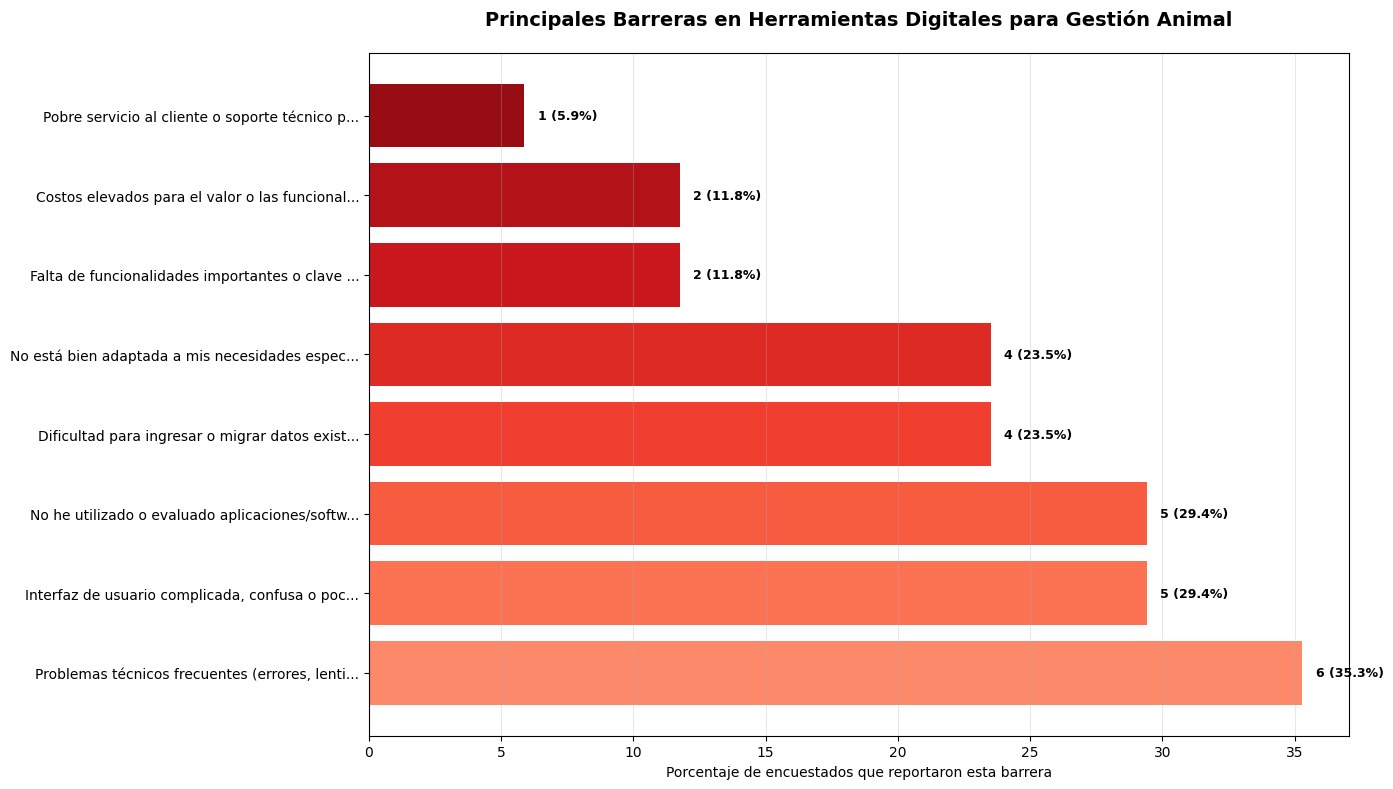


Total de barreras únicas identificadas: 10
Barreras reportadas por >20% de usuarios: 5


In [57]:
top_frustraciones = frustraciones_df.head(8)

plt.figure(figsize=(14, 8))
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_frustraciones)))
bars = plt.barh(range(len(top_frustraciones)), top_frustraciones['porcentaje'], color=colors)

labels = [label[:45] + '...' if len(label) > 45 else label for label in top_frustraciones['frustracion']]
plt.yticks(range(len(top_frustraciones)), labels)

for i, (bar, row) in enumerate(zip(bars, top_frustraciones.iterrows())):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{row[1]["menciones"]} ({width:.1f}%)', 
             ha='left', va='center', fontweight='bold', fontsize=9)

plt.xlabel('Porcentaje de encuestados que reportaron esta barrera')
plt.title('Principales Barreras en Herramientas Digitales para Gestión Animal', 
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal de barreras únicas identificadas: {len(frustraciones_df)}")
print(f"Barreras reportadas por >20% de usuarios: {len(frustraciones_df[frustraciones_df['porcentaje'] > 20])}")

### 7.2 Análisis de barreras tecnológicas específicas

Cuantificamos las limitaciones tecnológicas específicas basadas en las variables de acceso a internet, comodidad con pagos digitales y uso de aplicaciones móviles.

In [58]:
def mapear_acceso_internet(opcion):
    if "alta velocidad y estable" in str(opcion):
        return 4
    elif "velocidad media y generalmente estable" in str(opcion):
        return 3
    elif "baja velocidad o con interrupciones" in str(opcion):
        return 2
    elif "limitado, principalmente a través de datos móviles" in str(opcion):
        return 1
    elif "muy limitado o nulo" in str(opcion):
        return 0
    else:
        return None

def mapear_comodidad_pagos(opcion):
    if "Muy cómodo" in str(opcion):
        return 4
    elif "Moderadamente cómodo" in str(opcion):
        return 3
    elif "Algo incómodo" in str(opcion):
        return 2
    elif "Muy incómodo" in str(opcion):
        return 1
    elif "nunca lo hago" in str(opcion):
        return 0
    else:
        return None

def mapear_tiempo_apps(opcion):
    if "Más de 4 horas" in str(opcion):
        return 4
    elif "Entre 2 y 4 horas" in str(opcion):
        return 3
    elif "Entre 1 y 2 horas" in str(opcion):
        return 2
    elif "Menos de 1 hora" in str(opcion):
        return 1
    elif "No uso" in str(opcion):
        return 0
    else:
        return None

df['calidad_internet_num'] = df['acceso_internet'].apply(mapear_acceso_internet)
df['comodidad_pagos_num'] = df['comodidad_pagos_online'].apply(mapear_comodidad_pagos)
df['intensidad_uso_num'] = df['tiempo_uso_apps'].apply(mapear_tiempo_apps)

promedio_acceso = df['calidad_internet_num'].mean()
promedio_comodidad = df['comodidad_pagos_num'].mean()
promedio_uso = df['intensidad_uso_num'].mean()

nivel_acceso_pct = (promedio_acceso / 4) * 100
nivel_comodidad_pct = (promedio_comodidad / 4) * 100
nivel_uso_pct = (promedio_uso / 4) * 100

print("=== ANÁLISIS CUANTITATIVO DE BARRERAS TECNOLÓGICAS ===")
print(f"\nCalidad de acceso a internet:")
print(f"  Media: {promedio_acceso:.2f}/4 ({nivel_acceso_pct:.1f}%)")
print(f"\nComodidad con pagos digitales:")
print(f"  Media: {promedio_comodidad:.2f}/4 ({nivel_comodidad_pct:.1f}%)")
print(f"\nIntensidad de uso de apps:")
print(f"  Media: {promedio_uso:.2f}/4 ({nivel_uso_pct:.1f}%)")

=== ANÁLISIS CUANTITATIVO DE BARRERAS TECNOLÓGICAS ===

Calidad de acceso a internet:
  Media: 2.59/4 (64.7%)

Comodidad con pagos digitales:
  Media: 3.12/4 (77.9%)

Intensidad de uso de apps:
  Media: 3.00/4 (75.0%)


In [59]:
usuarios_limitados = df[df['calidad_internet_num'] <= 2]  
usuarios_reticentes_pagos = df[df['comodidad_pagos_num'] <= 2]  
usuarios_bajo_uso = df[df['intensidad_uso_num'] <= 2]  #

pct_limitados = (len(usuarios_limitados) / len(df)) * 100
pct_reticentes = (len(usuarios_reticentes_pagos) / len(df)) * 100
pct_bajo_uso = (len(usuarios_bajo_uso) / len(df)) * 100

print("\n=== SEGMENTOS CON BARRERAS TECNOLÓGICAS ===")
print(f"\nUsuarios con acceso limitado a internet: {len(usuarios_limitados)} ({pct_limitados:.1f}%)")
print(f"Usuarios reticentes a pagos digitales: {len(usuarios_reticentes_pagos)} ({pct_reticentes:.1f}%)")
print(f"Usuarios con bajo uso de aplicaciones: {len(usuarios_bajo_uso)} ({pct_bajo_uso:.1f}%)")

usuarios_multiples_barreras = df[
    (df['calidad_internet_num'] <= 2) & 
    (df['comodidad_pagos_num'] <= 2)
]

print(f"\nUsuarios con múltiples barreras tecnológicas: {len(usuarios_multiples_barreras)} ({(len(usuarios_multiples_barreras)/len(df))*100:.1f}%)")


=== SEGMENTOS CON BARRERAS TECNOLÓGICAS ===

Usuarios con acceso limitado a internet: 7 (41.2%)
Usuarios reticentes a pagos digitales: 4 (23.5%)
Usuarios con bajo uso de aplicaciones: 5 (29.4%)

Usuarios con múltiples barreras tecnológicas: 3 (17.6%)


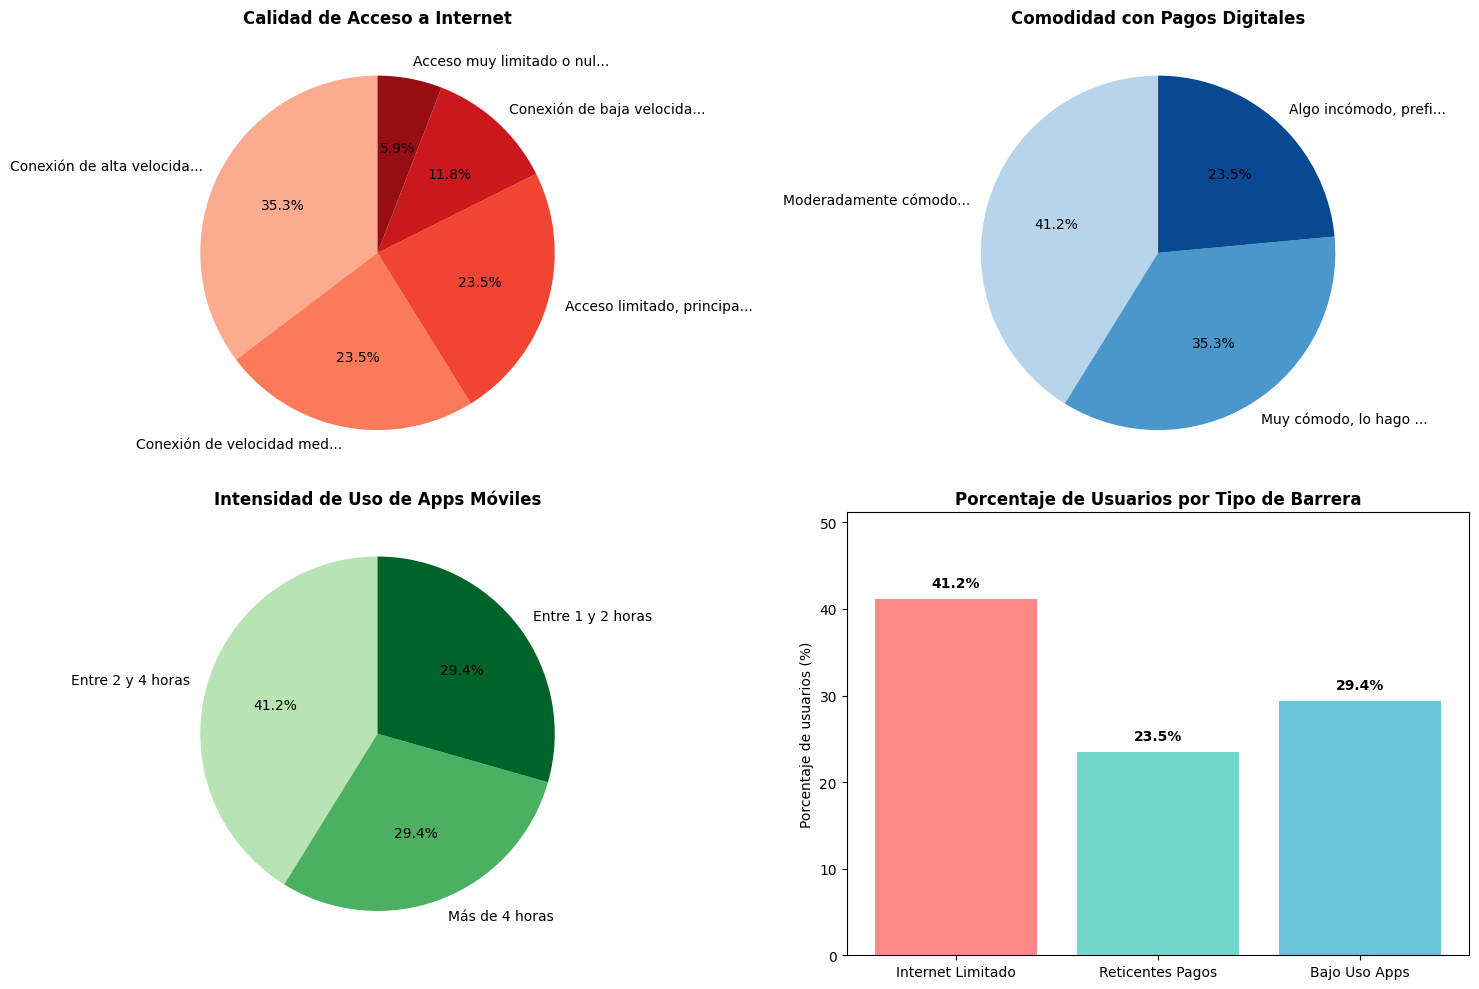

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

internet_counts = df['acceso_internet'].value_counts()
colors1 = plt.cm.Reds(np.linspace(0.3, 0.9, len(internet_counts)))
ax1.pie(internet_counts.values, labels=[label[:25] + '...' if len(label) > 25 else label for label in internet_counts.index], 
        autopct='%1.1f%%', colors=colors1, startangle=90)
ax1.set_title('Calidad de Acceso a Internet', fontweight='bold')

pagos_counts = df['comodidad_pagos_online'].value_counts()
colors2 = plt.cm.Blues(np.linspace(0.3, 0.9, len(pagos_counts)))
ax2.pie(pagos_counts.values, labels=[label[:20] + '...' if len(label) > 20 else label for label in pagos_counts.index], 
        autopct='%1.1f%%', colors=colors2, startangle=90)
ax2.set_title('Comodidad con Pagos Digitales', fontweight='bold')

tiempo_apps_counts = df['tiempo_uso_apps'].value_counts()
colors3 = plt.cm.Greens(np.linspace(0.3, 0.9, len(tiempo_apps_counts)))
ax3.pie(tiempo_apps_counts.values, labels=tiempo_apps_counts.index, 
        autopct='%1.1f%%', colors=colors3, startangle=90)
ax3.set_title('Intensidad de Uso de Apps Móviles', fontweight='bold')

barreras_data = ['Internet Limitado', 'Reticentes Pagos', 'Bajo Uso Apps']
barreras_values = [pct_limitados, pct_reticentes, pct_bajo_uso]
colors4 = ['#ff6b6b', '#4ecdc4', '#45b7d1']

bars = ax4.bar(barreras_data, barreras_values, color=colors4, alpha=0.8)
ax4.set_ylabel('Porcentaje de usuarios (%)')
ax4.set_title('Porcentaje de Usuarios por Tipo de Barrera', fontweight='bold')
ax4.set_ylim(0, max(barreras_values) + 10)

for bar, value in zip(bars, barreras_values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 7.3 Análisis de vulnerabilidad tecnológica por segmento

Creamos un índice de vulnerabilidad tecnológica que combina las diferentes barreras para identificar los segmentos que requieren estrategias de mitigación específicas.

In [61]:
segmentos_vulnerables = []

for segmento in df['relacion_animales'].unique():
    subset = df[df['relacion_animales'] == segmento]
    
    acceso_internet_prom = subset['calidad_internet_num'].mean()
    comodidad_pagos_prom = subset['comodidad_pagos_num'].mean()
    uso_apps_prom = subset['intensidad_uso_num'].mean()
    
    pct_limitados_internet = (len(subset[subset['calidad_internet_num'] <= 2]) / len(subset)) * 100
    pct_reticentes_pagos = (len(subset[subset['comodidad_pagos_num'] <= 2]) / len(subset)) * 100
    pct_bajo_uso_apps = (len(subset[subset['intensidad_uso_num'] <= 2]) / len(subset)) * 100
    
    indice_vulnerabilidad = (pct_limitados_internet + pct_reticentes_pagos + pct_bajo_uso_apps) / 3
    
    segmentos_vulnerables.append({
        'segmento': segmento,
        'usuarios': len(subset),
        'pct_total': (len(subset) / len(df)) * 100,
        'acceso_internet_prom': acceso_internet_prom,
        'comodidad_pagos_prom': comodidad_pagos_prom,
        'uso_apps_prom': uso_apps_prom,
        'pct_limitados_internet': pct_limitados_internet,
        'pct_reticentes_pagos': pct_reticentes_pagos,
        'pct_bajo_uso_apps': pct_bajo_uso_apps,
        'indice_vulnerabilidad': indice_vulnerabilidad
    })

segmentos_vulnerables_df = pd.DataFrame(segmentos_vulnerables)
segmentos_vulnerables_df = segmentos_vulnerables_df.sort_values('indice_vulnerabilidad', ascending=False)

print("=== ANÁLISIS DE VULNERABILIDAD TECNOLÓGICA POR SEGMENTO ===\n")
print(segmentos_vulnerables_df.round(2))

=== ANÁLISIS DE VULNERABILIDAD TECNOLÓGICA POR SEGMENTO ===

                                            segmento  usuarios  pct_total  \
0  Soy dueño/a principalmente de mascotas domésti...        12      70.59   
1  Manejo tanto mascotas domésticas como animales...         4      23.53   
2                        Soy profesional veterinario         1       5.88   

   acceso_internet_prom  comodidad_pagos_prom  uso_apps_prom  \
0                  2.83                  3.00           2.92   
1                  1.50                  3.25           3.25   
2                  4.00                  4.00           3.00   

   pct_limitados_internet  pct_reticentes_pagos  pct_bajo_uso_apps  \
0                   33.33                 33.33              41.67   
1                   75.00                  0.00               0.00   
2                    0.00                  0.00               0.00   

   indice_vulnerabilidad  
0                  36.11  
1                  25.00  
2          

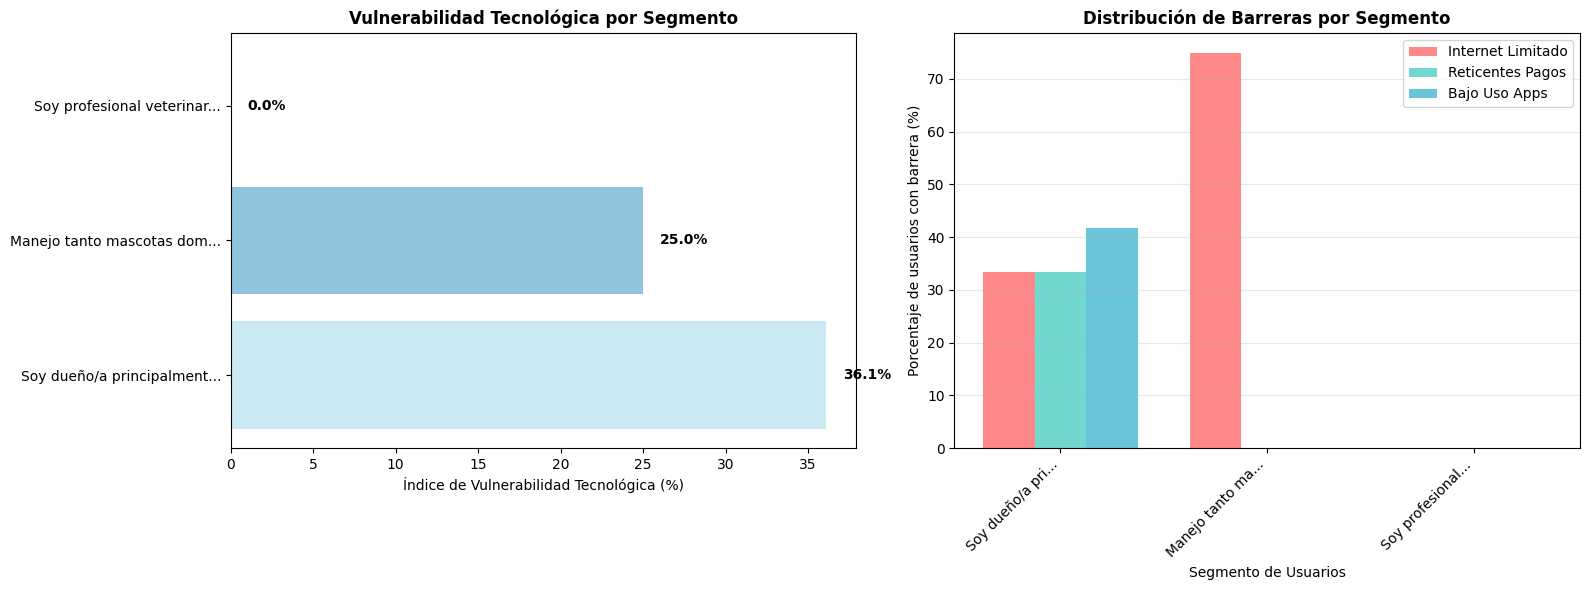


=== SEGMENTOS PRIORIZADOS PARA MITIGACIÓN DE BARRERAS ===

1. Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.).
   → Índice de vulnerabilidad: 36.1%
   → Usuarios afectados: 12 (70.6% del total)
   → Principal barrera: Uso Apps

2. Manejo tanto mascotas domésticas como animales de granja/rancho.
   → Índice de vulnerabilidad: 25.0%
   → Usuarios afectados: 4 (23.5% del total)
   → Principal barrera: Internet

3. Soy profesional veterinario
   → Índice de vulnerabilidad: 0.0%
   → Usuarios afectados: 1 (5.9% del total)
   → Principal barrera: Internet



In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = plt.cm.RdYlBu_r(segmentos_vulnerables_df['indice_vulnerabilidad'] / 100)
bars1 = ax1.barh(range(len(segmentos_vulnerables_df)), 
                 segmentos_vulnerables_df['indice_vulnerabilidad'], 
                 color=colors)

legend_labels = [label[:25] + '...' if len(label) > 25 else label 
                for label in segmentos_vulnerables_df['segmento']]
ax1.set_yticks(range(len(segmentos_vulnerables_df)))
ax1.set_yticklabels(legend_labels)
ax1.set_xlabel('Índice de Vulnerabilidad Tecnológica (%)')
ax1.set_title('Vulnerabilidad Tecnológica por Segmento', fontweight='bold')

for i, (bar, row) in enumerate(zip(bars1, segmentos_vulnerables_df.iterrows())):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

segmentos_short = [s[:15] + '...' if len(s) > 15 else s for s in segmentos_vulnerables_df['segmento']]
x = np.arange(len(segmentos_short))
width = 0.25

bars2 = ax2.bar(x - width, segmentos_vulnerables_df['pct_limitados_internet'], 
                width, label='Internet Limitado', color='#ff6b6b', alpha=0.8)
bars3 = ax2.bar(x, segmentos_vulnerables_df['pct_reticentes_pagos'], 
                width, label='Reticentes Pagos', color='#4ecdc4', alpha=0.8)
bars4 = ax2.bar(x + width, segmentos_vulnerables_df['pct_bajo_uso_apps'], 
                width, label='Bajo Uso Apps', color='#45b7d1', alpha=0.8)

ax2.set_xlabel('Segmento de Usuarios')
ax2.set_ylabel('Porcentaje de usuarios con barrera (%)')
ax2.set_title('Distribución de Barreras por Segmento', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(segmentos_short, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== SEGMENTOS PRIORIZADOS PARA MITIGACIÓN DE BARRERAS ===\n")
for i, (idx, segmento) in enumerate(segmentos_vulnerables_df.iterrows()):
    print(f"{i+1}. {segmento['segmento']}")
    print(f"   → Índice de vulnerabilidad: {segmento['indice_vulnerabilidad']:.1f}%")
    print(f"   → Usuarios afectados: {segmento['usuarios']} ({segmento['pct_total']:.1f}% del total)")
    print(f"   → Principal barrera: {'Internet' if segmento['pct_limitados_internet'] == max(segmento['pct_limitados_internet'], segmento['pct_reticentes_pagos'], segmento['pct_bajo_uso_apps']) else 'Pagos' if segmento['pct_reticentes_pagos'] == max(segmento['pct_limitados_internet'], segmento['pct_reticentes_pagos'], segmento['pct_bajo_uso_apps']) else 'Uso Apps'}")
    print()

## 8. Validación del Modelo de Negocio (Objetivo Específico 4)

### 8.1 Análisis de disposición de pago por segmento

Analizamos la disposición de pago de los usuarios para determinar la viabilidad financiera del proyecto y establecer estrategias de monetización diferenciadas por segmento de mercado.

In [63]:
disposicion_pago_mapping = {
    "Nada, esperaría que fuera gratuita o un valor agregado de otro servicio que ya utilizo.": "PAGO_000",
    "Menos de $200 MXN": "PAGO_100",
    "Entre $201 - $500 MXN": "PAGO_350",
    "Entre $501 - $1,000 MXN": "PAGO_750",
    "Entre $1,001 - $2,000 MXN": "PAGO_1500",
    "Más de $2,000 MXN": "PAGO_2500",
    "Preferiría un modelo de pago por uso o por servicio específico, no una suscripción mensual.": "PAGO_USO",
    "Preferiría un modelo de pago único por licencia o descarga.": "PAGO_UNICO",
    "No estoy seguro/a en este momento.": "PAGO_INDECISO"
}

def mapear_disposicion_pago_valor(opcion):
    valor_mapping = {
        "PAGO_000": 0,
        "PAGO_100": 100,
        "PAGO_350": 350,
        "PAGO_750": 750,
        "PAGO_1500": 1500,
        "PAGO_2500": 2500,
        "PAGO_USO": 300,  
        "PAGO_UNICO": 400,  
        "PAGO_INDECISO": None
    }
    return valor_mapping.get(opcion, None)

print("=== ANÁLISIS DE DISPOSICIÓN DE PAGO ===")
print("\nOpciones únicas encontradas en disposicion_pago:")
disposicion_unicas = set()
for respuesta in df['disposicion_pago'].dropna():
    disposicion_unicas.add(str(respuesta))

for i, disposicion in enumerate(sorted(disposicion_unicas), 1):
    print(f"{i:2d}. {disposicion}")
    print()

=== ANÁLISIS DE DISPOSICIÓN DE PAGO ===

Opciones únicas encontradas en disposicion_pago:
 1. Entre $201 - $500 MXN

 2. Entre $501 - $1,000 MXN

 3. Menos de $200 MXN

 4. Nada, esperaría que fuera gratuita o un valor agregado de otro servicio que ya utilizo.

 5. No estoy seguro/a en este momento.

 6. Preferiría un modelo de pago por uso o por servicio específico, no una suscripción mensual.

 7. Preferiría un modelo de pago único por licencia o descarga.



In [64]:
disposicion_series = df['disposicion_pago'].dropna()

df['disposicion_pago_codigo'] = df['disposicion_pago'].map(disposicion_pago_mapping)
df['disposicion_pago_valor'] = df['disposicion_pago_codigo'].apply(mapear_disposicion_pago_valor)

disposicion_counts = df['disposicion_pago'].value_counts()
disposicion_pct = (disposicion_counts / len(df)) * 100

valores_validos = df['disposicion_pago_valor'].dropna()
promedio_disposicion = valores_validos.mean()
mediana_disposicion = valores_validos.median()
usuarios_dispuestos_pagar = len(df[df['disposicion_pago_valor'] > 0])
pct_dispuestos_pagar = (usuarios_dispuestos_pagar / len(df)) * 100

print("\n=== MÉTRICAS DE DISPOSICIÓN DE PAGO ===\n")
print(f"Usuarios dispuestos a pagar (>$0): {usuarios_dispuestos_pagar} ({pct_dispuestos_pagar:.1f}%)")
print(f"Promedio de disposición de pago: ${promedio_disposicion:.0f} MXN mensuales")
print(f"Mediana de disposición de pago: ${mediana_disposicion:.0f} MXN mensuales")

print("\n=== DISTRIBUCIÓN DETALLADA ===\n")
for opcion, count in disposicion_counts.items():
    porcentaje = (count / len(df)) * 100
    print(f"{opcion[:50]}{'...' if len(opcion) > 50 else ''}")
    print(f"  → {count} usuarios ({porcentaje:.1f}%)")
    print()


=== MÉTRICAS DE DISPOSICIÓN DE PAGO ===

Usuarios dispuestos a pagar (>$0): 15 (88.2%)
Promedio de disposición de pago: $334 MXN mensuales
Mediana de disposición de pago: $350 MXN mensuales

=== DISTRIBUCIÓN DETALLADA ===

Preferiría un modelo de pago único por licencia o ...
  → 4 usuarios (23.5%)

Preferiría un modelo de pago por uso o por servici...
  → 3 usuarios (17.6%)

Menos de $200 MXN
  → 3 usuarios (17.6%)

Entre $201 - $500 MXN
  → 3 usuarios (17.6%)

Entre $501 - $1,000 MXN
  → 2 usuarios (11.8%)

Nada, esperaría que fuera gratuita o un valor agre...
  → 1 usuarios (5.9%)

No estoy seguro/a en este momento.
  → 1 usuarios (5.9%)



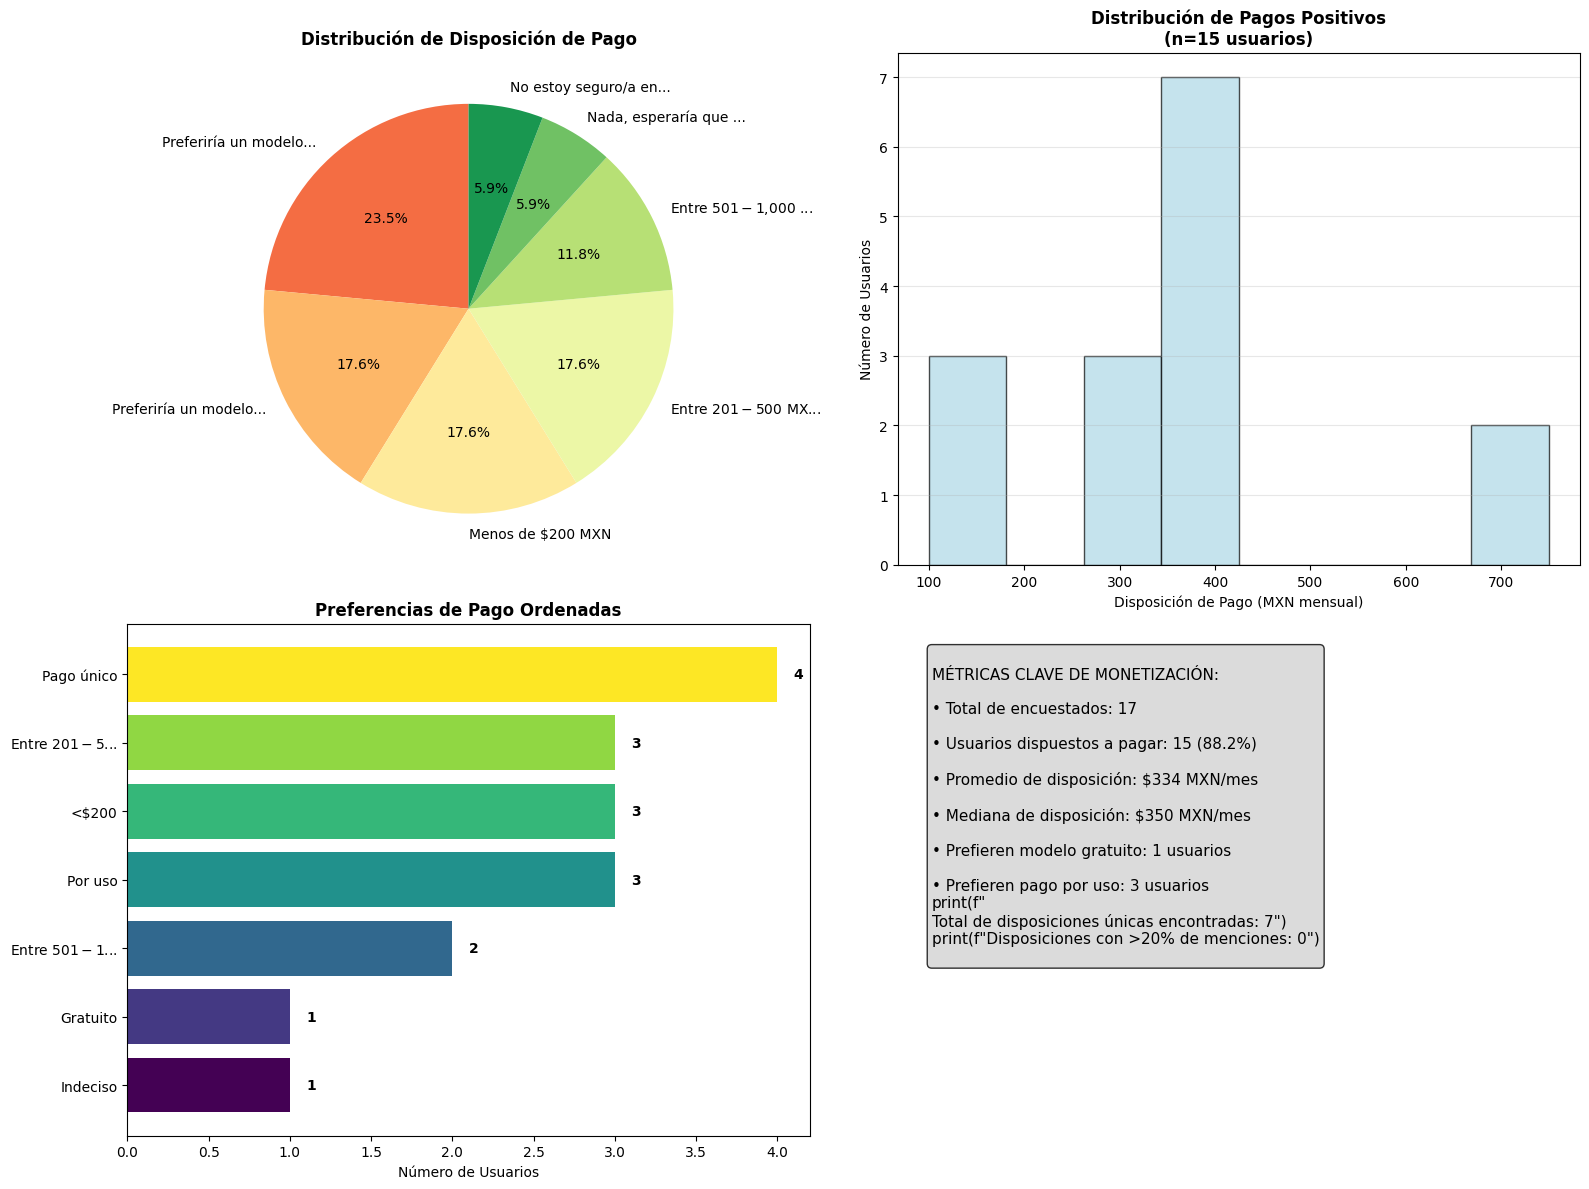

In [65]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

colors1 = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(disposicion_counts)))
wedges, texts, autotexts = ax1.pie(disposicion_counts.values, 
                                   labels=[label[:20] + '...' if len(label) > 20 else label for label in disposicion_counts.index],
                                   autopct='%1.1f%%', colors=colors1, startangle=90)
ax1.set_title('Distribución de Disposición de Pago', fontweight='bold', fontsize=12)

valores_positivos = df[df['disposicion_pago_valor'] > 0]['disposicion_pago_valor']
ax2.hist(valores_positivos, bins=8, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_xlabel('Disposición de Pago (MXN mensual)')
ax2.set_ylabel('Número de Usuarios')
ax2.set_title(f'Distribución de Pagos Positivos\n(n={len(valores_positivos)} usuarios)', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

disposicion_ordenada = disposicion_counts.sort_values(ascending=True)
colors3 = plt.cm.viridis(np.linspace(0, 1, len(disposicion_ordenada)))
bars = ax3.barh(range(len(disposicion_ordenada)), disposicion_ordenada.values, color=colors3)

labels_cortas = []
for label in disposicion_ordenada.index:
    if "Nada" in label:
        labels_cortas.append("Gratuito")
    elif "Menos de" in label:
        labels_cortas.append("<$200")
    elif "201 - 500" in label:
        labels_cortas.append("$201-500")
    elif "501 - 1,000" in label:
        labels_cortas.append("$501-1,000")
    elif "pago por uso" in label:
        labels_cortas.append("Por uso")
    elif "pago único" in label:
        labels_cortas.append("Pago único")
    elif "No estoy seguro" in label:
        labels_cortas.append("Indeciso")
    else:
        labels_cortas.append(label[:15] + '...')

ax3.set_yticks(range(len(disposicion_ordenada)))
ax3.set_yticklabels(labels_cortas)
ax3.set_xlabel('Número de Usuarios')
ax3.set_title('Preferencias de Pago Ordenadas', fontweight='bold')

for i, (bar, valor) in enumerate(zip(bars, disposicion_ordenada.values)):
    ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             str(valor), ha='left', va='center', fontweight='bold')

ax4.axis('off')
metricas_text = f"""
MÉTRICAS CLAVE DE MONETIZACIÓN:

• Total de encuestados: {len(df)}

• Usuarios dispuestos a pagar: {usuarios_dispuestos_pagar} ({pct_dispuestos_pagar:.1f}%)

• Promedio de disposición: ${promedio_disposicion:.0f} MXN/mes

• Mediana de disposición: ${mediana_disposicion:.0f} MXN/mes

• Prefieren modelo gratuito: {disposicion_counts.get('Nada, esperaría que fuera gratuita o un valor agregado de otro servicio que ya utilizo.', 0)} usuarios

• Prefieren pago por uso: {disposicion_counts.get('Preferiría un modelo de pago por uso o por servicio específico, no una suscripción mensual.', 0)} usuarios
print(f"\nTotal de disposiciones únicas encontradas: {len(disposicion_counts)}")
print(f"Disposiciones con >20% de menciones: {len(disposicion_counts[disposicion_counts > 20])}")
"""

ax4.text(0.05, 0.95, metricas_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

### 8.3 Análisis de modelos de monetización preferidos

Evaluamos las preferencias de modelos de monetización para diseñar una estrategia de precios que maximize la adopción y los ingresos.

In [66]:
modelos_detalle = {}

for modelo in df['disposicion_pago'].unique():
    subset = df[df['disposicion_pago'] == modelo]
    
    modelos_detalle[modelo] = {
        'usuarios': len(subset),
        'porcentaje': (len(subset) / len(df)) * 100,
        'probabilidad_uso_promedio': subset['probabilidad_uso_app'].value_counts().to_dict(),
        'segmentos': subset['relacion_animales'].value_counts().to_dict()
    }

print("=== ANÁLISIS DE MODELOS DE MONETIZACIÓN ===\n")

modelos_categorizados = {
    'Gratuito': [],
    'Suscripción': [],
    'Pago único': [],
    'Pago por uso': [],
    'Indeciso': []
}

for modelo, datos in modelos_detalle.items():
    if "gratuita" in modelo.lower():
        modelos_categorizados['Gratuito'].append((modelo, datos))
    elif "único" in modelo.lower():
        modelos_categorizados['Pago único'].append((modelo, datos))
    elif "uso" in modelo.lower():
        modelos_categorizados['Pago por uso'].append((modelo, datos))
    elif "seguro" in modelo.lower():
        modelos_categorizados['Indeciso'].append((modelo, datos))
    else:
        modelos_categorizados['Suscripción'].append((modelo, datos))

total_por_categoria = {}
for categoria, modelos in modelos_categorizados.items():
    total_usuarios = sum([datos['usuarios'] for _, datos in modelos])
    total_pct = sum([datos['porcentaje'] for _, datos in modelos])
    total_por_categoria[categoria] = {
        'usuarios': total_usuarios,
        'porcentaje': total_pct
    }
    
    print(f"📊 {categoria.upper()}:")
    print(f"   Total usuarios: {total_usuarios} ({total_pct:.1f}%)")
    
    for modelo, datos in modelos:
        print(f"   • {modelo[:50]}{'...' if len(modelo) > 50 else ''}")
        print(f"     → {datos['usuarios']} usuarios ({datos['porcentaje']:.1f}%)")
    print()

=== ANÁLISIS DE MODELOS DE MONETIZACIÓN ===

📊 GRATUITO:
   Total usuarios: 1 (5.9%)
   • Nada, esperaría que fuera gratuita o un valor agre...
     → 1 usuarios (5.9%)

📊 SUSCRIPCIÓN:
   Total usuarios: 8 (47.1%)
   • Menos de $200 MXN
     → 3 usuarios (17.6%)
   • Entre $501 - $1,000 MXN
     → 2 usuarios (11.8%)
   • Entre $201 - $500 MXN
     → 3 usuarios (17.6%)

📊 PAGO ÚNICO:
   Total usuarios: 4 (23.5%)
   • Preferiría un modelo de pago único por licencia o ...
     → 4 usuarios (23.5%)

📊 PAGO POR USO:
   Total usuarios: 3 (17.6%)
   • Preferiría un modelo de pago por uso o por servici...
     → 3 usuarios (17.6%)

📊 INDECISO:
   Total usuarios: 1 (5.9%)
   • No estoy seguro/a en este momento.
     → 1 usuarios (5.9%)



## 9. Análisis de Adopción Digital (Objetivo Específico 5)

### 9.1 Evaluación de madurez tecnológica

Evaluamos el nivel de madurez tecnológica de los usuarios para establecer estrategias de onboarding y experiencia de usuario diferenciadas.


=== ANÁLISIS DE ADOPCIÓN TECNOLÓGICA ===

Distribución de niveles de adopción tecnológica:
• Muy básico (prácticamente no utilizamos herramientas digitales): 4 usuarios (23.5%)
• Básico (usamos principalmente métodos tradicionales con mínima tecnología): 4 usuarios (23.5%)
• Intermedio (combinamos métodos digitales y tradicionales): 7 usuarios (41.2%)
• Avanzado (utilizamos algunas herramientas digitales clave): 1 usuarios (5.9%)
• Muy avanzado (utilizamos múltiples herramientas digitales integradas): 1 usuarios (5.9%)

Índice de madurez tecnológica promedio: 36.8/100


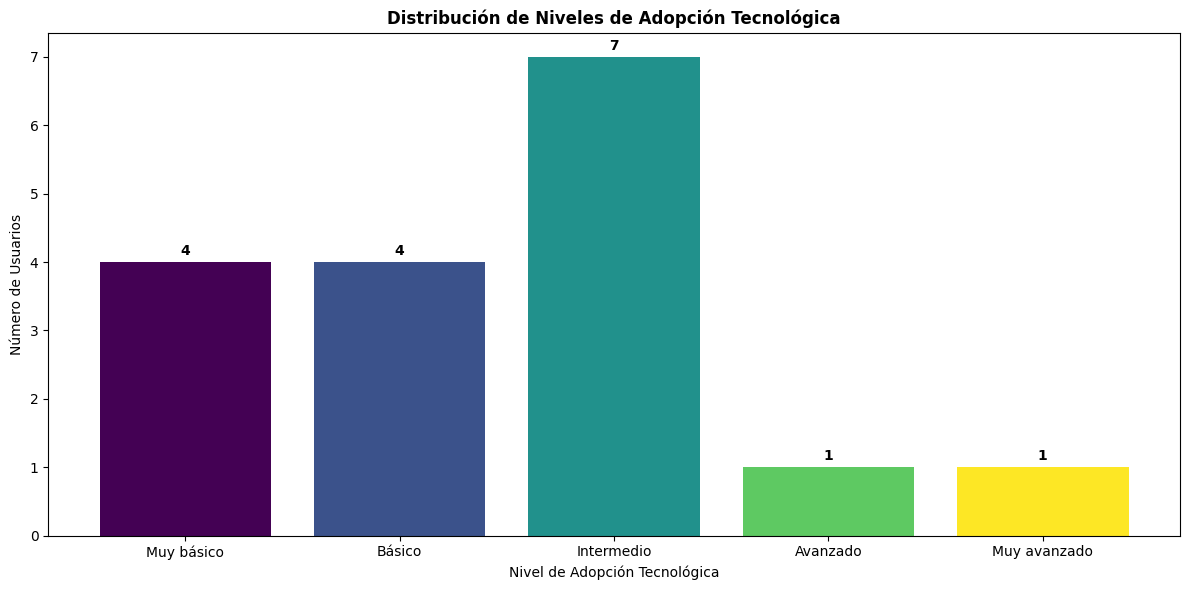

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ANÁLISIS DE ADOPCIÓN TECNOLÓGICA ===\n")

nivel_adopcion_orden = [
    "Muy básico (prácticamente no utilizamos herramientas digitales)",
    "Básico (usamos principalmente métodos tradicionales con mínima tecnología)",
    "Intermedio (combinamos métodos digitales y tradicionales)",
    "Avanzado (utilizamos algunas herramientas digitales clave)",
    "Muy avanzado (utilizamos múltiples herramientas digitales integradas)"
]

df['nivel_adopcion_cat'] = pd.Categorical(
    df['nivel_adopcion_tecnologica'],
    categories=nivel_adopcion_orden,
    ordered=True
)

adopcion_counts = df['nivel_adopcion_cat'].value_counts().sort_index()
adopcion_pct = (adopcion_counts / len(df)) * 100

print("Distribución de niveles de adopción tecnológica:")
for nivel, count in adopcion_counts.items():
    porcentaje = (count / len(df)) * 100
    print(f"• {nivel}: {count} usuarios ({porcentaje:.1f}%)")

def mapear_nivel_adopcion(nivel):
    if "Muy básico" in nivel:
        return 0
    elif "Básico" in nivel:
        return 25
    elif "Intermedio" in nivel:
        return 50
    elif "Avanzado" in nivel:
        return 75
    elif "Muy avanzado" in nivel:
        return 100
    else:
        return None

df['indice_madurez_tecnologica'] = df['nivel_adopcion_tecnologica'].apply(mapear_nivel_adopcion)
df['indice_madurez_tecnologica'] = df['indice_madurez_tecnologica'].astype(float)
indice_promedio = df['indice_madurez_tecnologica'].mean()

print(f"\nÍndice de madurez tecnológica promedio: {indice_promedio:.1f}/100")

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(adopcion_counts)))

labels_cortas = [
    "Muy básico",
    "Básico",
    "Intermedio",
    "Avanzado",
    "Muy avanzado"
]

plt.bar(labels_cortas, adopcion_counts.values, color=colors)
plt.xlabel('Nivel de Adopción Tecnológica')
plt.ylabel('Número de Usuarios')
plt.title('Distribución de Niveles de Adopción Tecnológica', fontweight='bold')

for i, v in enumerate(adopcion_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


=== FACTORES DE ADOPCIÓN TECNOLÓGICA ===

Correlación entre madurez tecnológica y tiempo de uso de apps: -0.42
Correlación entre madurez tecnológica y comodidad con pagos digitales: -0.35


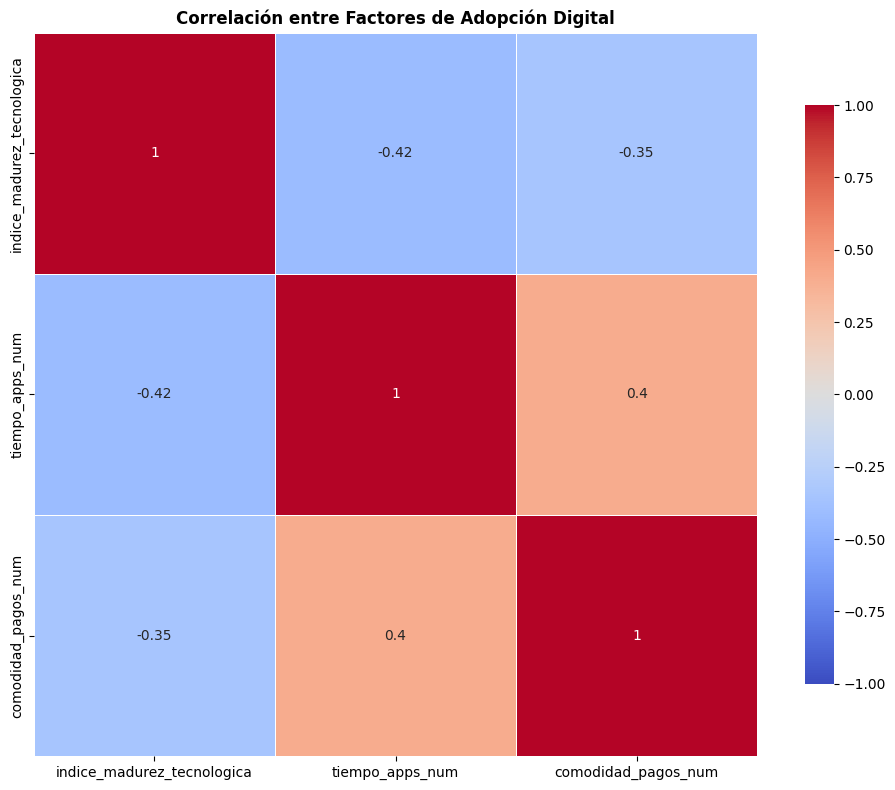


=== ANÁLISIS DE DISPOSITIVOS UTILIZADOS ===

Dispositivos utilizados por los usuarios:
• Smartphone (teléfono inteligente): 15 usuarios (88.2%)
• Computadora (laptop o de escritorio): 6 usuarios (35.3%)
• Tablet: 2 usuarios (11.8%)
• Dispositivos especializados para ganadería o veterinaria (ej. lectores de crotales, equipos de diagnóstico portátiles): 2 usuarios (11.8%)


C:\Users\maste\AppData\Local\Temp\ipykernel_20756\1976895242.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dispositivo', y='usuarios', data=dispositivos_df, palette='viridis')
C:\Users\maste\AppData\Local\Temp\ipykernel_20756\1976895242.py:94: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


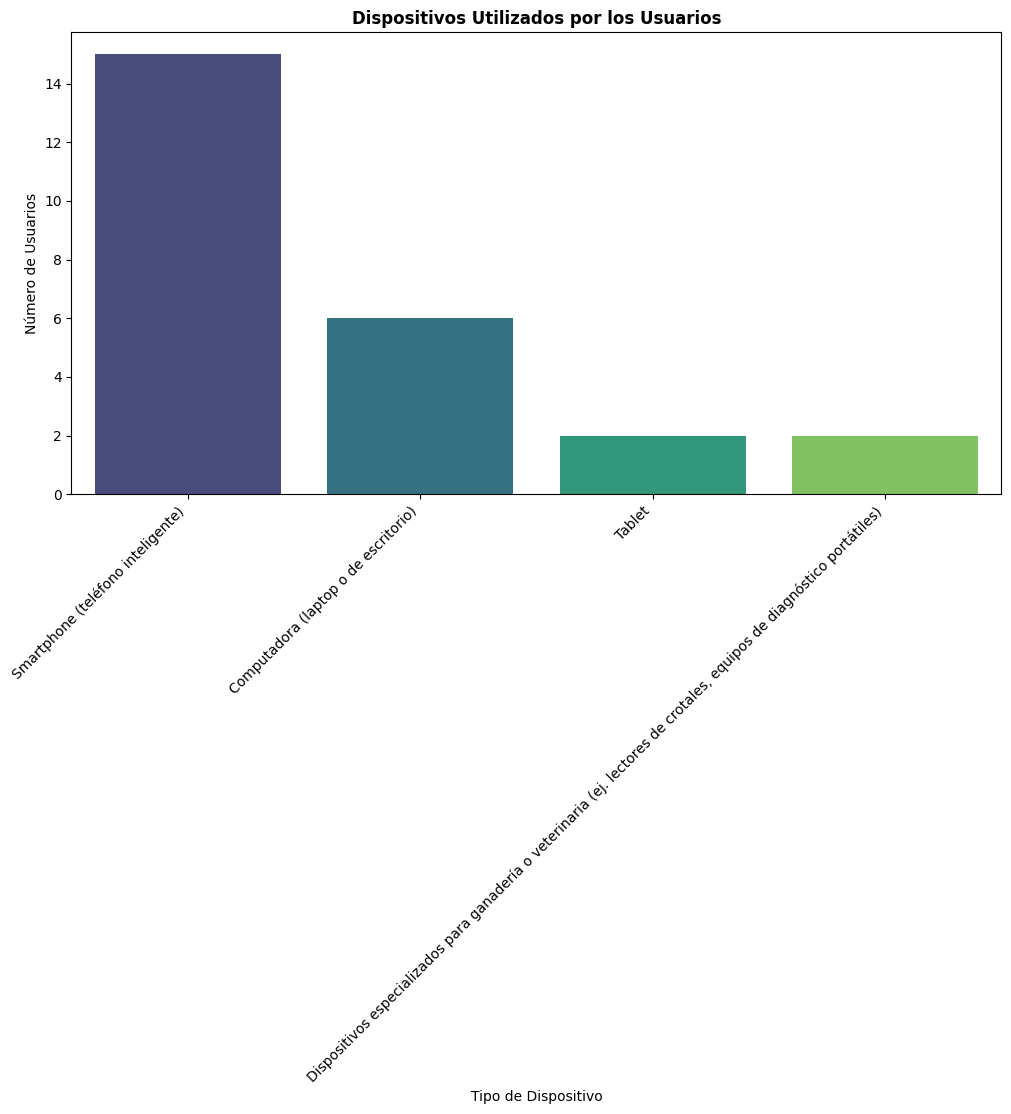

In [68]:
print("=== FACTORES DE ADOPCIÓN TECNOLÓGICA ===\n")

def mapear_tiempo_apps(opcion):
    if "Más de 4 horas" in str(opcion):
        return 4
    elif "Entre 2 y 4 horas" in str(opcion):
        return 3
    elif "Entre 1 y 2 horas" in str(opcion):
        return 2
    elif "Menos de 1 hora" in str(opcion):
        return 1
    elif "No uso" in str(opcion):
        return 0
    else:
        return None

df['tiempo_apps_num'] = df['tiempo_uso_apps'].apply(mapear_tiempo_apps)

correlacion_adopcion_tiempo = df['indice_madurez_tecnologica'].corr(df['tiempo_apps_num'])
print(f"Correlación entre madurez tecnológica y tiempo de uso de apps: {correlacion_adopcion_tiempo:.2f}")

def mapear_comodidad_pagos(opcion):
    if "Muy cómodo" in str(opcion):
        return 4
    elif "Moderadamente cómodo" in str(opcion):
        return 3
    elif "Algo incómodo" in str(opcion):
        return 2
    elif "Muy incómodo" in str(opcion):
        return 1
    elif "nunca lo hago" in str(opcion):
        return 0
    else:
        return None

df['comodidad_pagos_num'] = df['comodidad_pagos_online'].apply(mapear_comodidad_pagos)

correlacion_adopcion_pagos = df['indice_madurez_tecnologica'].corr(df['comodidad_pagos_num'])
print(f"Correlación entre madurez tecnológica y comodidad con pagos digitales: {correlacion_adopcion_pagos:.2f}")

variables_adopcion = [
    'indice_madurez_tecnologica', 
    'tiempo_apps_num', 
    'comodidad_pagos_num'
]

matriz_corr = df[variables_adopcion].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlación entre Factores de Adopción Digital', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n=== ANÁLISIS DE DISPOSITIVOS UTILIZADOS ===\n")

dispositivos_posibles = [
    "Smartphone (teléfono inteligente)",
    "Tablet",
    "Computadora (laptop o de escritorio)",
    "Dispositivos especializados para ganadería o veterinaria (ej. lectores de crotales, equipos de diagnóstico portátiles)",
    "Principalmente registros y gestión en papel, con uso mínimo de tecnología digital"
]

dispositivos_counts = {dispositivo: 0 for dispositivo in dispositivos_posibles}

for respuesta in df['dispositivos_principales'].dropna():
    respuesta_str = str(respuesta)
    for dispositivo in dispositivos_posibles:
        if dispositivo in respuesta_str:
            dispositivos_counts[dispositivo] += 1

dispositivos_counts = {k: v for k, v in dispositivos_counts.items() if v > 0}

dispositivos_df = pd.DataFrame({
    'dispositivo': list(dispositivos_counts.keys()),
    'usuarios': list(dispositivos_counts.values()),
    'porcentaje': [count / len(df) * 100 for count in dispositivos_counts.values()]
}).sort_values('usuarios', ascending=False)

print("Dispositivos utilizados por los usuarios:")
for idx, row in dispositivos_df.iterrows():
    print(f"• {row['dispositivo']}: {row['usuarios']} usuarios ({row['porcentaje']:.1f}%)")

plt.figure(figsize=(12, 6))
sns.barplot(x='dispositivo', y='usuarios', data=dispositivos_df, palette='viridis')
plt.title('Dispositivos Utilizados por los Usuarios', fontweight='bold')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

=== ADOPCIÓN TECNOLÓGICA POR SEGMENTOS ===

Nivel de adopción tecnológica por relación con animales (%):
nivel_adopcion_cat                                  Muy básico (prácticamente no utilizamos herramientas digitales)  \
relacion_animales                                                                                                     
Manejo tanto mascotas domésticas como animales ...                                               25.0                 
Soy dueño/a principalmente de mascotas doméstic...                                               16.7                 
Soy profesional veterinario                                                                     100.0                 

nivel_adopcion_cat                                  Básico (usamos principalmente métodos tradicionales con mínima tecnología)  \
relacion_animales                                                                                                                
Manejo tanto mascotas domésticas como a

C:\Users\maste\AppData\Local\Temp\ipykernel_20756\379489252.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  madurez_por_relacion = df.groupby('relacion_animales')['indice_madurez_tecnologica'].mean()
C:\Users\maste\AppData\Local\Temp\ipykernel_20756\379489252.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=madurez_por_relacion.index, y=madurez_por_relacion.values, palette='viridis')


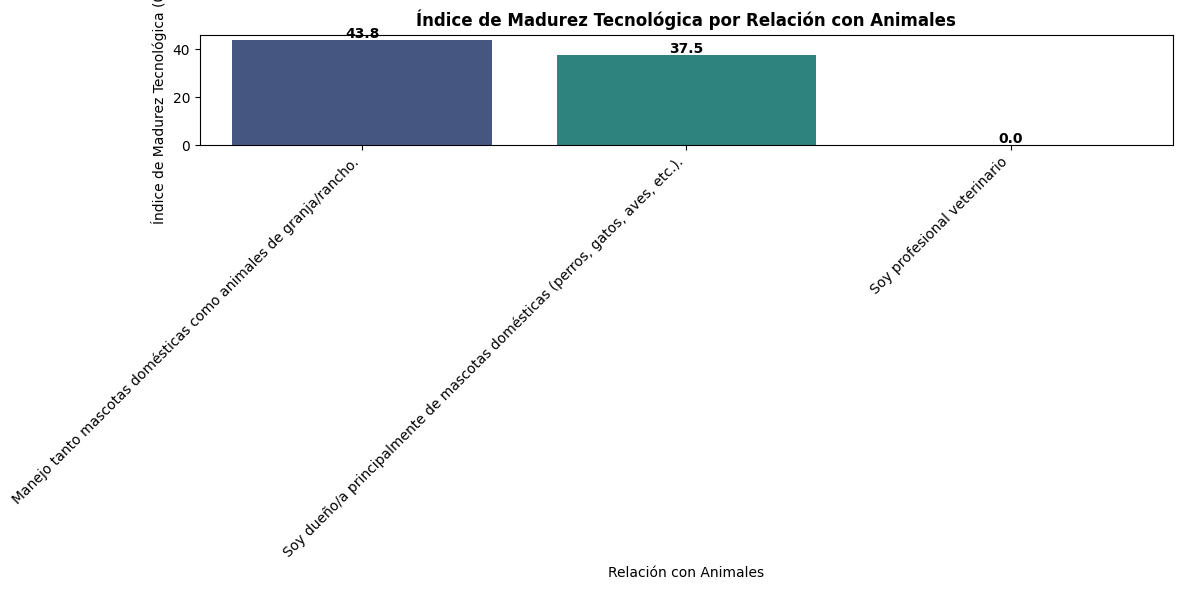

C:\Users\maste\AppData\Local\Temp\ipykernel_20756\379489252.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=madurez_por_localidad.index, y=madurez_por_localidad.values, palette='plasma')


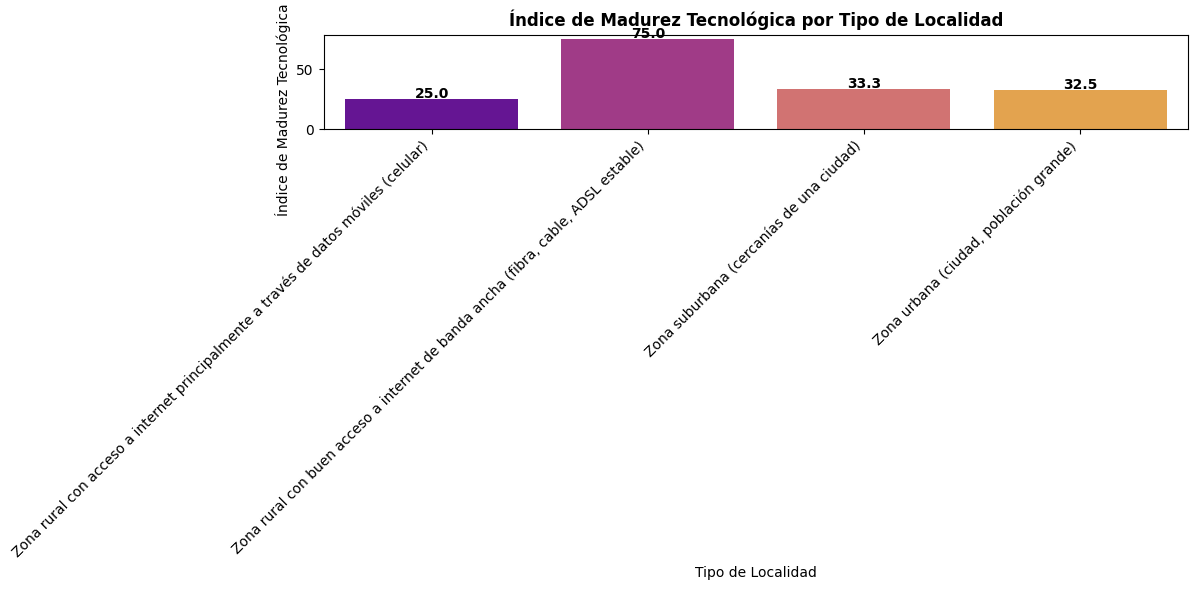

In [69]:
print("=== ADOPCIÓN TECNOLÓGICA POR SEGMENTOS ===\n")

adopcion_por_relacion = pd.crosstab(
    df['relacion_animales'], 
    df['nivel_adopcion_cat'],
    normalize='index'
) * 100

print("Nivel de adopción tecnológica por relación con animales (%):")
print(adopcion_por_relacion.round(1))

madurez_por_relacion = df.groupby('relacion_animales')['indice_madurez_tecnologica'].mean()
print("\nÍndice de madurez tecnológica promedio por tipo de relación:")
for relacion, indice in madurez_por_relacion.items():
    print(f"• {relacion}: {indice:.1f}/100")

adopcion_por_localidad = pd.crosstab(
    df['tipo_localidad'], 
    df['nivel_adopcion_cat'],
    normalize='index'
) * 100

print("\nNivel de adopción tecnológica por tipo de localidad (%):")
print(adopcion_por_localidad.round(1))

madurez_por_localidad = df.groupby('tipo_localidad')['indice_madurez_tecnologica'].mean()
print("\nÍndice de madurez tecnológica promedio por tipo de localidad:")
for localidad, indice in madurez_por_localidad.items():
    print(f"• {localidad}: {indice:.1f}/100")

plt.figure(figsize=(12, 6))
sns.barplot(x=madurez_por_relacion.index, y=madurez_por_relacion.values, palette='viridis')
plt.title('Índice de Madurez Tecnológica por Relación con Animales', fontweight='bold')
plt.xlabel('Relación con Animales')
plt.ylabel('Índice de Madurez Tecnológica (0-100)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(madurez_por_relacion.values):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=madurez_por_localidad.index, y=madurez_por_localidad.values, palette='plasma')
plt.title('Índice de Madurez Tecnológica por Tipo de Localidad', fontweight='bold')
plt.xlabel('Tipo de Localidad')
plt.ylabel('Índice de Madurez Tecnológica (0-100)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(madurez_por_localidad.values):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


=== ADOPCIÓN TECNOLÓGICA Y NECESIDADES MÓVILES ===

Importancia de dispositivos móviles por nivel de adopción tecnológica (%):
importancia_dispositivos_moviles                    Extremadamente importante  \
nivel_adopcion_cat                                                              
Muy básico (prácticamente no utilizamos herrami...                       25.0   
Básico (usamos principalmente métodos tradicion...                       25.0   
Intermedio (combinamos métodos digitales y trad...                        0.0   
Avanzado (utilizamos algunas herramientas digit...                        0.0   
Muy avanzado (utilizamos múltiples herramientas...                      100.0   

importancia_dispositivos_moviles                    Moderadamente importante  \
nivel_adopcion_cat                                                             
Muy básico (prácticamente no utilizamos herrami...                      25.0   
Básico (usamos principalmente métodos tradicion...               

C:\Users\maste\AppData\Local\Temp\ipykernel_20756\1097508483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='importancia_dispositivos_moviles', y='indice_madurez_tecnologica', data=df, palette='viridis')


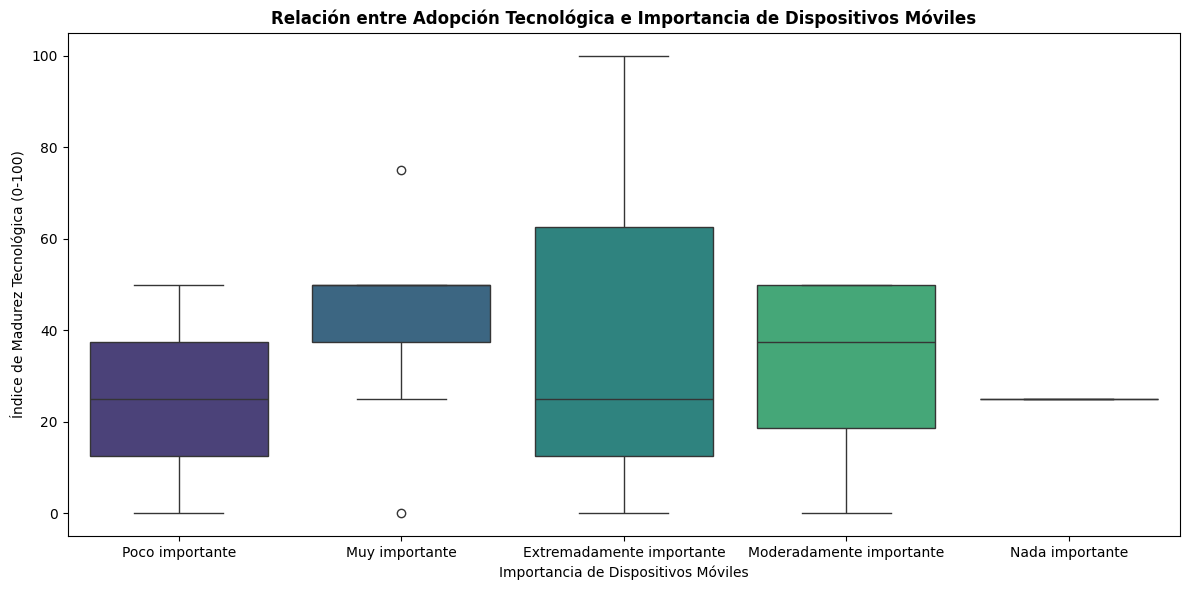


Estrategias de onboarding recomendadas:
• Prioridad Media: Usuario Intermedio: 7 usuarios (41.2%)
• Prioridad Alta: Usuario Básico con Alta Necesidad Móvil: 4 usuarios (23.5%)
• Prioridad Media: Usuario Básico con Baja Necesidad Móvil: 4 usuarios (23.5%)
• Prioridad Baja: Usuario Avanzado: 2 usuarios (11.8%)


C:\Users\maste\AppData\Local\Temp\ipykernel_20756\1097508483.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='estrategia_onboarding', data=df, palette='viridis', order=estrategia_counts.index)


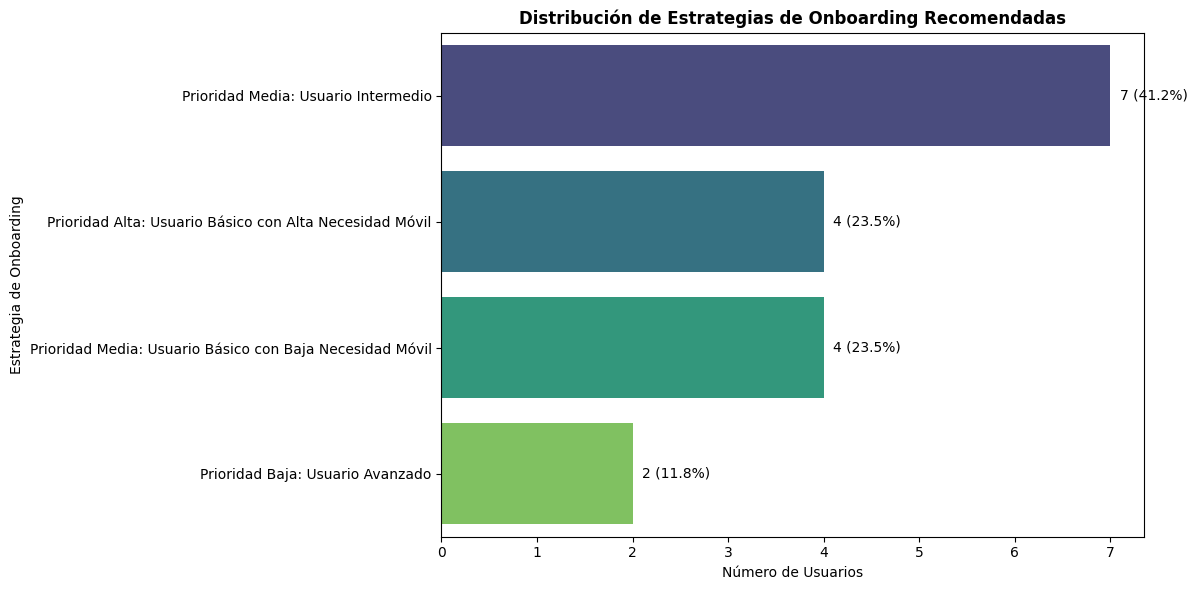


=== CONCLUSIONES DE ADOPCIÓN TECNOLÓGICA ===

• Índice promedio de madurez tecnológica: 36.8/100
• Nivel de adopción predominante: Intermedio (combinamos métodos digitales y tradicionales) (41.2%)
• Estrategia de onboarding prioritaria: Prioridad Media: Usuario Intermedio (41.2%)
• Dispositivo más utilizado: Smartphone (teléfono inteligente) (88.2%)
• Correlación adopción-uso de apps: -0.42
• Correlación adopción-pagos digitales: -0.35


In [70]:
print("=== ADOPCIÓN TECNOLÓGICA Y NECESIDADES MÓVILES ===\n")

tabla_importancia_adopcion = pd.crosstab(
    df['nivel_adopcion_cat'], 
    df['importancia_dispositivos_moviles'],
    normalize='index'
) * 100

print("Importancia de dispositivos móviles por nivel de adopción tecnológica (%):")
print(tabla_importancia_adopcion.round(1))

plt.figure(figsize=(12, 6))
sns.boxplot(x='importancia_dispositivos_moviles', y='indice_madurez_tecnologica', data=df, palette='viridis')
plt.title('Relación entre Adopción Tecnológica e Importancia de Dispositivos Móviles', fontweight='bold')
plt.xlabel('Importancia de Dispositivos Móviles')
plt.ylabel('Índice de Madurez Tecnológica (0-100)')
plt.tight_layout()
plt.show()

niveles_estrategia = []

for idx, row in df.iterrows():
    nivel_adopcion = row['nivel_adopcion_tecnologica']
    importancia_movil = row['importancia_dispositivos_moviles']
    
    if "Muy básico" in nivel_adopcion or "Básico" in nivel_adopcion:
        if "Extremadamente importante" in importancia_movil or "Muy importante" in importancia_movil:
            estrategia = "Prioridad Alta: Usuario Básico con Alta Necesidad Móvil"
        else:
            estrategia = "Prioridad Media: Usuario Básico con Baja Necesidad Móvil"
    elif "Intermedio" in nivel_adopcion:
        estrategia = "Prioridad Media: Usuario Intermedio"
    else:
        estrategia = "Prioridad Baja: Usuario Avanzado"
    
    niveles_estrategia.append(estrategia)

df['estrategia_onboarding'] = niveles_estrategia

estrategia_counts = df['estrategia_onboarding'].value_counts()
estrategia_pct = (estrategia_counts / len(df)) * 100

print("\nEstrategias de onboarding recomendadas:")
for estrategia, count in estrategia_counts.items():
    porcentaje = (count / len(df)) * 100
    print(f"• {estrategia}: {count} usuarios ({porcentaje:.1f}%)")

plt.figure(figsize=(12, 6))
sns.countplot(y='estrategia_onboarding', data=df, palette='viridis', order=estrategia_counts.index)
plt.title('Distribución de Estrategias de Onboarding Recomendadas', fontweight='bold')
plt.xlabel('Número de Usuarios')
plt.ylabel('Estrategia de Onboarding')

for i, v in enumerate(estrategia_counts.values):
    plt.text(v + 0.1, i, f"{v} ({estrategia_pct.values[i]:.1f}%)", va='center')

plt.tight_layout()
plt.show()

print("\n=== CONCLUSIONES DE ADOPCIÓN TECNOLÓGICA ===\n")
print(f"• Índice promedio de madurez tecnológica: {indice_promedio:.1f}/100")

nivel_predominante = adopcion_counts.idxmax()
print(f"• Nivel de adopción predominante: {nivel_predominante} ({adopcion_pct[nivel_predominante]:.1f}%)")

estrategia_predominante = estrategia_counts.idxmax()
print(f"• Estrategia de onboarding prioritaria: {estrategia_predominante} ({estrategia_pct.max():.1f}%)")

dispositivo_principal = dispositivos_df.iloc[0]['dispositivo']
print(f"• Dispositivo más utilizado: {dispositivo_principal} ({dispositivos_df.iloc[0]['porcentaje']:.1f}%)")

print(f"• Correlación adopción-uso de apps: {correlacion_adopcion_tiempo:.2f}")
print(f"• Correlación adopción-pagos digitales: {correlacion_adopcion_pagos:.2f}")


## 10. Mapeo de Necesidades No Cubiertas (Objetivo Específico 6)

### 10.1 Identificación de gaps en soluciones actuales

Identificamos gaps en soluciones actuales utilizadas por los usuarios para definir ventajas competitivas diferenciadoras.


=== USO ACTUAL DE HERRAMIENTAS DIGITALES ===

Uso actual de herramientas digitales:
• No, no utilizo ninguna herramienta digital específica para esto.: 9 usuarios (52.9%)
• Sí, uso aplicaciones generales de recordatorios, notas o comunicación (ej. calendario, WhatsApp para notas personales).: 5 usuarios (29.4%)
• Sí, uso grupos en redes sociales (Facebook, WhatsApp, etc.) para consultas informales o buscar información.: 3 usuarios (17.6%)


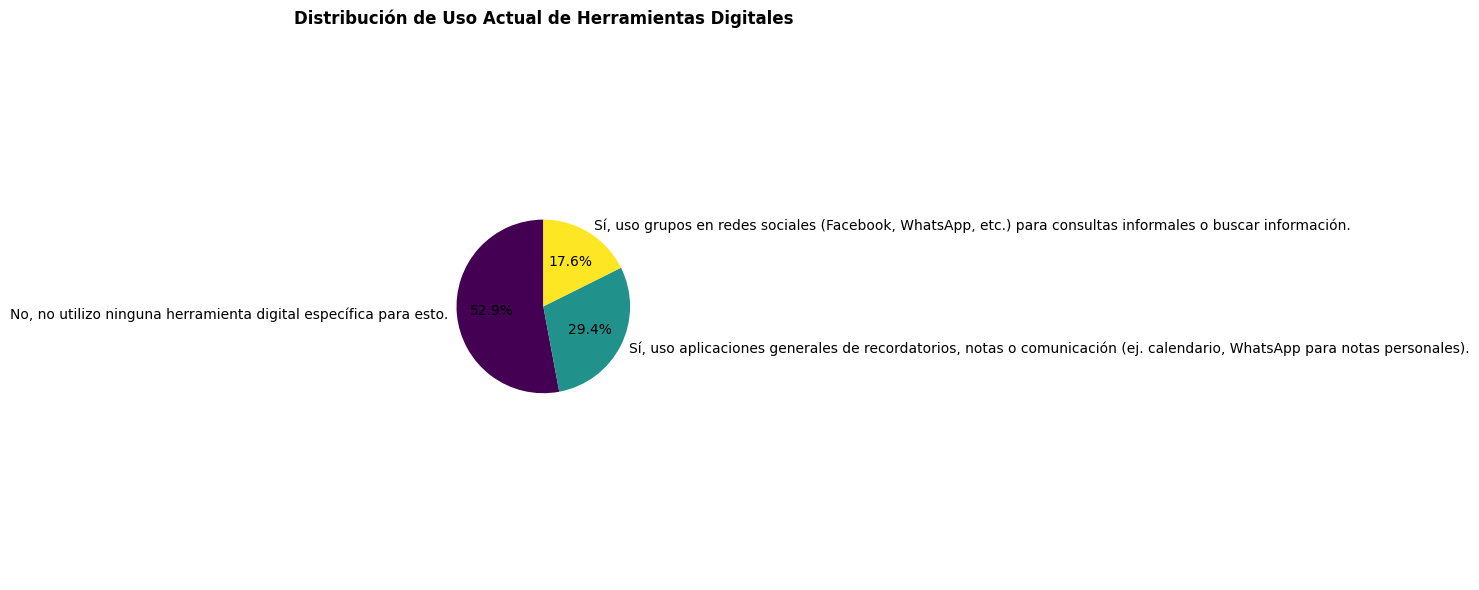


=== VALORACIÓN DE HERRAMIENTAS ACTUALES ===

Aspectos más valorados de herramientas actuales:
• No aplica, no utilizo herramientas digitales para esto.: 9 usuarios (52.9%)
• La mejora en la organización y el acceso a la información.: 4 usuarios (23.5%)
• El ahorro de tiempo que me supone en la gestión diaria.: 3 usuarios (17.6%)
• El acceso a la información desde cualquier lugar y dispositivo (movilidad).: 1 usuarios (5.9%)


C:\Users\maste\AppData\Local\Temp\ipykernel_20756\239378322.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='categoria_uso_digital', data=df,


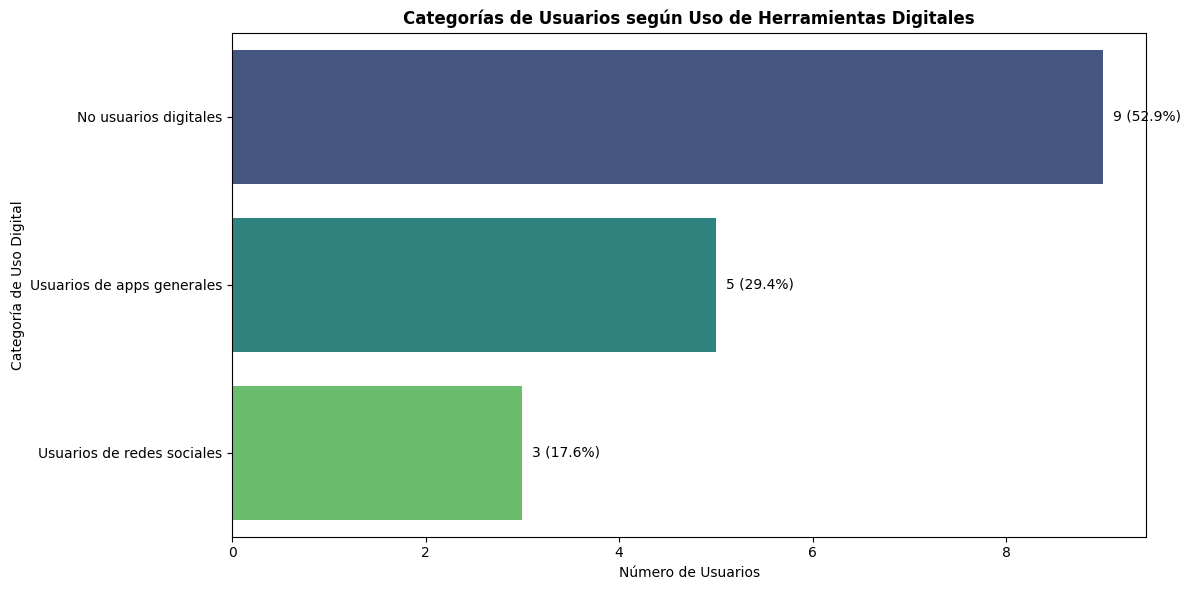

In [71]:
print("=== USO ACTUAL DE HERRAMIENTAS DIGITALES ===\n")

df['uso_actual_cat'] = df['uso_actual_herramientas_digitales'].astype('category')

uso_actual_counts = df['uso_actual_cat'].value_counts()
uso_actual_pct = (uso_actual_counts / len(df)) * 100

print("Uso actual de herramientas digitales:")
for uso, count in uso_actual_counts.items():
    porcentaje = (count / len(df)) * 100
    print(f"• {uso}: {count} usuarios ({porcentaje:.1f}%)")

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(uso_actual_counts)))

plt.pie(uso_actual_counts.values, labels=uso_actual_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Distribución de Uso Actual de Herramientas Digitales', fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


print("\n=== VALORACIÓN DE HERRAMIENTAS ACTUALES ===\n")

valor_herramientas_counts = df['valor_herramientas_actuales'].value_counts()
valor_herramientas_pct = (valor_herramientas_counts / len(df)) * 100

print("Aspectos más valorados de herramientas actuales:")
for valor, count in valor_herramientas_counts.items():
    porcentaje = (count / len(df)) * 100
    print(f"• {valor}: {count} usuarios ({porcentaje:.1f}%)")

def categorizar_uso_digital(uso):
    if pd.isna(uso):
        return "Sin información"
    elif "No" in uso:
        return "No usuarios digitales"
    elif "grupos en redes sociales" in uso:
        return "Usuarios de redes sociales"
    elif "aplicaciones generales" in uso:
        return "Usuarios de apps generales"
    elif "software veterinario" in uso:
        return "Usuarios de software especializado"
    else:
        return "Otros"

df['categoria_uso_digital'] = df['uso_actual_herramientas_digitales'].apply(categorizar_uso_digital)

categoria_uso_counts = df['categoria_uso_digital'].value_counts()
categoria_uso_pct = (categoria_uso_counts / len(df)) * 100

plt.figure(figsize=(12, 6))
sns.countplot(y='categoria_uso_digital', data=df, 
              order=categoria_uso_counts.index, palette='viridis')
plt.title('Categorías de Usuarios según Uso de Herramientas Digitales', fontweight='bold')
plt.xlabel('Número de Usuarios')
plt.ylabel('Categoría de Uso Digital')

for i, v in enumerate(categoria_uso_counts.values):
    plt.text(v + 0.1, i, f"{v} ({categoria_uso_pct.values[i]:.1f}%)", va='center')

plt.tight_layout()
plt.show()


=== ANÁLISIS DE FRUSTRACIONES Y CARENCIAS ===

Principales frustraciones y carencias reportadas:
• Interfaz de usuario complicada, confusa o poco intuitiva.
  → 11 menciones (64.7% de usuarios)
• Problemas técnicos frecuentes (errores, lentitud, caídas del sistema).
  → 6 menciones (35.3% de usuarios)
• No he utilizado o evaluado aplicaciones/software de este tipo.
  → 5 menciones (29.4% de usuarios)
• Dificultad para ingresar o migrar datos existentes de mis animales.
  → 4 menciones (23.5% de usuarios)
• No está bien adaptada a mis necesidades específicas (ej. muy genérica, o enfocad...
  → 4 menciones (23.5% de usuarios)
• Falta de funcionalidades importantes o clave para mis necesidades.
  → 2 menciones (11.8% de usuarios)
• Costos elevados para el valor o las funcionalidades que ofrece.
  → 2 menciones (11.8% de usuarios)
• Pobre servicio al cliente o soporte técnico por parte del proveedor.
  → 1 menciones (5.9% de usuarios)
• Poca o nula capacidad de uso sin conexión a internet 

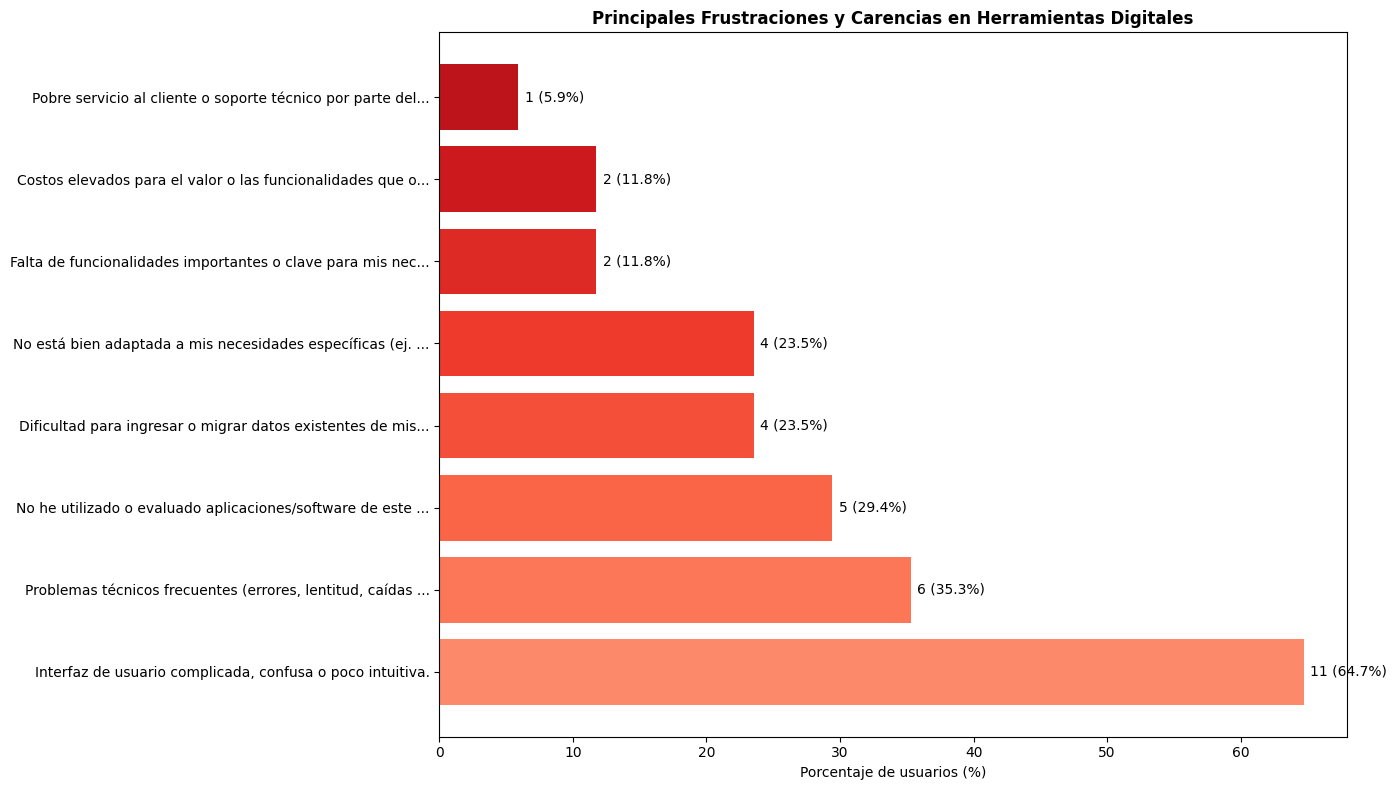


=== FRUSTRACIONES POR CATEGORÍA DE USUARIO DIGITAL ===

Frustraciones para Usuarios de redes sociales (n=3):
• Interfaz de usuario complicada, confusa o poco intuitiva.: 2 (66.7%)
• Problemas técnicos frecuentes (errores, lentitud, caídas del...: 2 (66.7%)
• Dificultad para ingresar o migrar datos existentes de mis an...: 1 (33.3%)

Frustraciones para No usuarios digitales (n=9):
• Interfaz de usuario complicada, confusa o poco intuitiva.: 8 (88.9%)
• No he utilizado o evaluado aplicaciones/software de este tip...: 4 (44.4%)
• Problemas técnicos frecuentes (errores, lentitud, caídas del...: 3 (33.3%)

Frustraciones para Usuarios de apps generales (n=5):
• Dificultad para ingresar o migrar datos existentes de mis an...: 3 (60.0%)
• Falta de funcionalidades importantes o clave para mis necesi...: 2 (40.0%)
• No está bien adaptada a mis necesidades específicas (ej. muy...: 2 (40.0%)



<Figure size 1400x800 with 0 Axes>

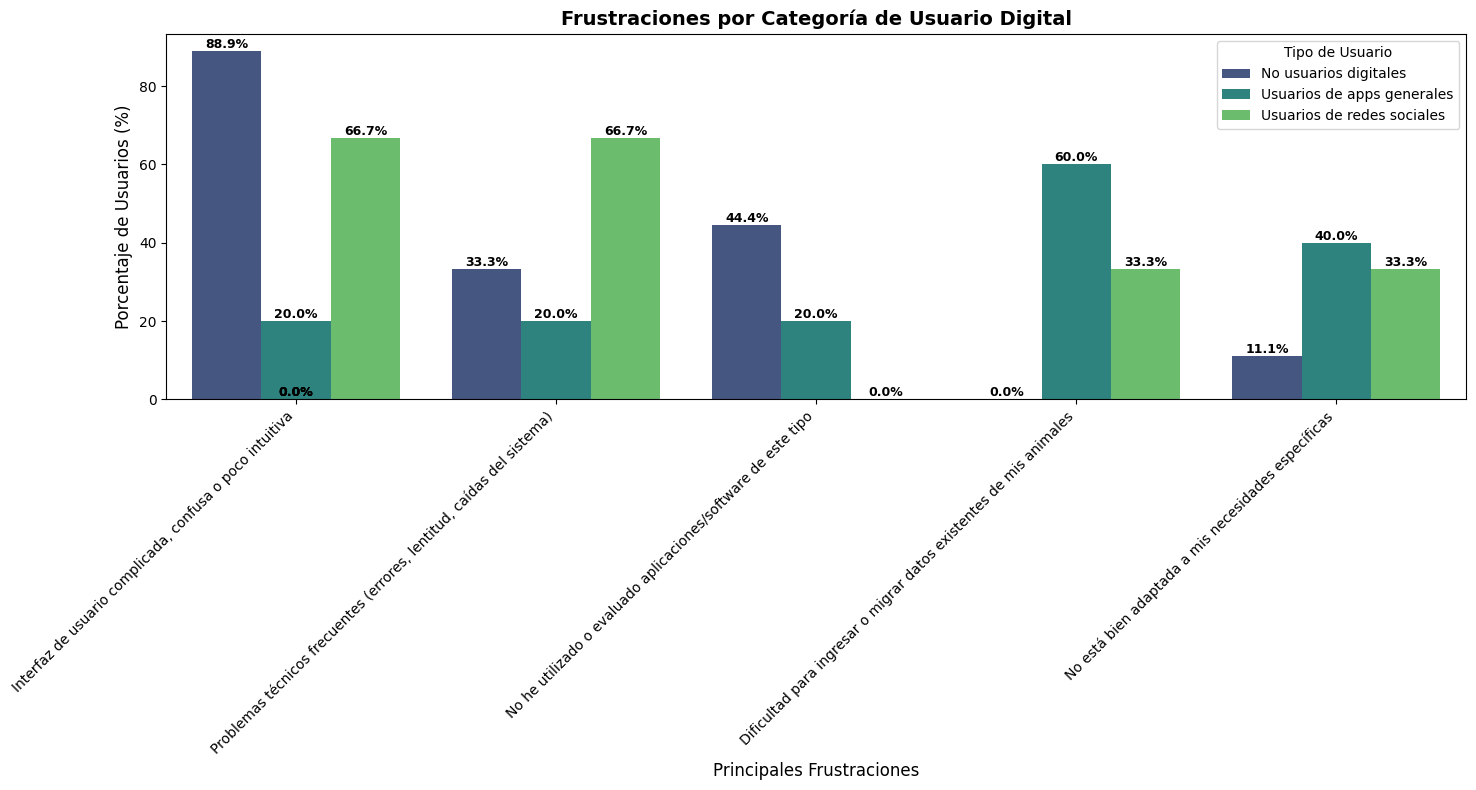

Frustraciones para Sí, uso grupos en redes sociales (Facebook, WhatsApp, etc.) para consultas informales o buscar información. (n=3):
• Interfaz de usuario complicada, confusa o poco intuitiva.: 2 (66.7%)
• Problemas técnicos frecuentes (errores, lentitud, caídas del...: 2 (66.7%)
• Dificultad para ingresar o migrar datos existentes de mis an...: 1 (33.3%)

Frustraciones para No, no utilizo ninguna herramienta digital específica para esto. (n=9):
• Interfaz de usuario complicada, confusa o poco intuitiva.: 8 (88.9%)
• No he utilizado o evaluado aplicaciones/software de este tip...: 4 (44.4%)
• Problemas técnicos frecuentes (errores, lentitud, caídas del...: 3 (33.3%)

Frustraciones para Sí, uso aplicaciones generales de recordatorios, notas o comunicación (ej. calendario, WhatsApp para notas personales). (n=5):
• Dificultad para ingresar o migrar datos existentes de mis an...: 3 (60.0%)
• Falta de funcionalidades importantes o clave para mis necesi...: 2 (40.0%)
• No está bien adaptada

In [72]:
print("=== ANÁLISIS DE FRUSTRACIONES Y CARENCIAS ===\n")

opciones_encuesta = [
    "Interfaz de usuario complicada, confusa o poco intuitiva.",
    "Falta de funcionalidades importantes o clave para mis necesidades.",
    "Problemas técnicos frecuentes (errores, lentitud, caídas del sistema).",
    "Costos elevados para el valor o las funcionalidades que ofrece.",
    "Dificultad para ingresar o migrar datos existentes de mis animales.",
    "Poca o nula capacidad de uso sin conexión a internet (offline).",
    "No está bien adaptada a mis necesidades específicas (ej. muy genérica, o enfocada a un solo tipo de animal que no es el mío).",
    "Pobre servicio al cliente o soporte técnico por parte del proveedor.",
    "Preocupaciones sobre la seguridad y privacidad de mis datos y los de mis animales.",
    "No he utilizado o evaluado aplicaciones/software de este tipo."
]

def mapear_a_opcion_completa(fragmento):
    for opcion in opciones_encuesta:
        if fragmento.strip() in opcion:
            return opcion
    return fragmento.strip()

frustraciones_conteo = {}

for respuesta in df['frustraciones_carencias'].dropna():
    frustraciones_identificadas = []
    fragmentos = [f.strip() for f in str(respuesta).split(',')]
    
    i = 0
    while i < len(fragmentos):
        fragmento_actual = fragmentos[i]
        if "(" in fragmento_actual and ")" not in fragmento_actual and i+1 < len(fragmentos):
            j = i + 1
            fragmento_combinado = fragmento_actual
            while j < len(fragmentos) and ")" not in fragmentos[j]:
                fragmento_combinado += ", " + fragmentos[j]
                j += 1
            
            if j < len(fragmentos):
                fragmento_combinado += ", " + fragmentos[j]
                opcion_completa = mapear_a_opcion_completa(fragmento_combinado)
                frustraciones_identificadas.append(opcion_completa)
                i = j + 1
                continue

        opcion_completa = mapear_a_opcion_completa(fragmento_actual)
        frustraciones_identificadas.append(opcion_completa)
        i += 1

    for frustracion in frustraciones_identificadas:
        if frustracion in frustraciones_conteo:
            frustraciones_conteo[frustracion] += 1
        else:
            frustraciones_conteo[frustracion] = 1

frustraciones_df = pd.DataFrame({
    'frustracion': list(frustraciones_conteo.keys()),
    'menciones': list(frustraciones_conteo.values()),
    'porcentaje': [count / len(df) * 100 for count in frustraciones_conteo.values()]
}).sort_values('menciones', ascending=False)

frustraciones_df = frustraciones_df[frustraciones_df['frustracion'].str.len() > 5]

print("Principales frustraciones y carencias reportadas:")
for idx, row in frustraciones_df.head(10).iterrows():
    print(f"• {row['frustracion'][:80]}{'...' if len(row['frustracion']) > 80 else ''}")
    print(f"  → {row['menciones']} menciones ({row['porcentaje']:.1f}% de usuarios)")

plt.figure(figsize=(14, 8))
top_frustraciones = frustraciones_df.head(8)

labels_cortas = []
for frustracion in top_frustraciones['frustracion']:
    if len(frustracion) > 60:
        labels_cortas.append(frustracion[:57] + "...")
    else:
        labels_cortas.append(frustracion)

colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(top_frustraciones)))
bars = plt.barh(range(len(top_frustraciones)), top_frustraciones['porcentaje'], color=colors)
plt.yticks(range(len(top_frustraciones)), labels_cortas)
plt.xlabel('Porcentaje de usuarios (%)')
plt.title('Principales Frustraciones y Carencias en Herramientas Digitales', fontweight='bold')

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f"{top_frustraciones['menciones'].iloc[i]} ({top_frustraciones['porcentaje'].iloc[i]:.1f}%)", 
             va='center')

plt.tight_layout()
plt.show()

print("\n=== FRUSTRACIONES POR CATEGORÍA DE USUARIO DIGITAL ===\n")

def analizar_frustraciones_segmento(segmento_df, nombre_segmento):
    frustraciones_segmento = {}
    
    for respuesta in segmento_df['frustraciones_carencias'].dropna():

        frustraciones_identificadas = []
        fragmentos = [f.strip() for f in str(respuesta).split(',')]
        
        i = 0
        while i < len(fragmentos):
            fragmento_actual = fragmentos[i]
            
            if "(" in fragmento_actual and ")" not in fragmento_actual and i+1 < len(fragmentos):
                j = i + 1
                fragmento_combinado = fragmento_actual
                while j < len(fragmentos) and ")" not in fragmentos[j]:
                    fragmento_combinado += ", " + fragmentos[j]
                    j += 1
                
                if j < len(fragmentos):
                    fragmento_combinado += ", " + fragmentos[j]
                    opcion_completa = mapear_a_opcion_completa(fragmento_combinado)
                    frustraciones_identificadas.append(opcion_completa)
                    i = j + 1
                    continue
            
            opcion_completa = mapear_a_opcion_completa(fragmento_actual)
            frustraciones_identificadas.append(opcion_completa)
            i += 1
        
        for frustracion in frustraciones_identificadas:
            if len(frustracion) > 5:
                if frustracion in frustraciones_segmento:
                    frustraciones_segmento[frustracion] += 1
                else:
                    frustraciones_segmento[frustracion] = 1

    if frustraciones_segmento:
        frustraciones_segmento_df = pd.DataFrame({
            'frustracion': list(frustraciones_segmento.keys()),
            'menciones': list(frustraciones_segmento.values()),
            'porcentaje': [count / len(segmento_df) * 100 for count in frustraciones_segmento.values()]
        }).sort_values('menciones', ascending=False)
        
        print(f"Frustraciones para {nombre_segmento} (n={len(segmento_df)}):")
        for idx, row in frustraciones_segmento_df.head(3).iterrows():
            print(f"• {row['frustracion'][:60]}{'...' if len(row['frustracion']) > 60 else ''}: {row['menciones']} ({row['porcentaje']:.1f}%)")
        print()
        
        return frustraciones_segmento_df
    else:
        print(f"No hay datos de frustraciones para {nombre_segmento}\n")
        return pd.DataFrame()

frustraciones_por_categoria = {}

for categoria in df['categoria_uso_digital'].dropna().unique():
    subset = df[df['categoria_uso_digital'] == categoria]
    if len(subset) > 0:
        resultado = analizar_frustraciones_segmento(subset, categoria)
        if not resultado.empty:
            frustraciones_por_categoria[categoria] = resultado

plt.figure(figsize=(14, 8))

categorias_principales = ['No usuarios digitales', 'Usuarios de apps generales', 'Usuarios de redes sociales']
top_frustraciones = [
    'Interfaz de usuario complicada, confusa o poco intuitiva.',
    'Problemas técnicos frecuentes (errores, lentitud, caídas del sistema).',
    'No he utilizado o evaluado aplicaciones/software de este tipo.',
    'Dificultad para ingresar o migrar datos existentes de mis animales.',
    'No está bien adaptada a mis necesidades específicas'
]

datos_grafico = []
etiquetas = []
categorias_grafico = []

for categoria in categorias_principales:
    if categoria in frustraciones_por_categoria:
        df_cat = frustraciones_por_categoria[categoria]
        for frustracion in top_frustraciones:
            for idx, row in df_cat.iterrows():
                if frustracion in row['frustracion']:
                    datos_grafico.append(row['porcentaje'])
                    etiquetas.append(frustracion.split('.')[0])
                    categorias_grafico.append(categoria)
                    break
            else:
                datos_grafico.append(0)
                etiquetas.append(frustracion.split('.')[0])
                categorias_grafico.append(categoria)

df_grafico = pd.DataFrame({
    'Categoría': categorias_grafico,
    'Frustración': etiquetas,
    'Porcentaje': datos_grafico
})

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Frustración', y='Porcentaje', hue='Categoría', data=df_grafico, palette='viridis')
plt.title('Frustraciones por Categoría de Usuario Digital', fontweight='bold', fontsize=14)
plt.xlabel('Principales Frustraciones', fontsize=12)
plt.ylabel('Porcentaje de Usuarios (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Usuario')

for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

for categoria in df['uso_actual_herramientas_digitales'].dropna().unique():
    subset = df[df['uso_actual_herramientas_digitales'] == categoria]
    if len(subset) > 0:
        analizar_frustraciones_segmento(subset, categoria)

print("\n=== GAPS Y OPORTUNIDADES IDENTIFICADAS ===\n")

top_gaps = frustraciones_df.head(5)['frustracion'].tolist()

print("Principales gaps identificados en soluciones actuales:")
for i, gap in enumerate(top_gaps):
    print(f"{i+1}. {gap}")

print("\nOportunidades de diferenciación:")

soluciones_predeterminadas = {
    "interfaz": [
        "Diseño de interfaz minimalista con principios de UX centrados en el usuario",
        "Asistentes interactivos y tutoriales integrados para nuevos usuarios",
        "Personalización de la interfaz según perfil y frecuencia de uso"
    ],
    "tecnicos": [
        "Arquitectura robusta con sincronización inteligente para evitar pérdidas",
        "Modo offline completo con todas las funcionalidades críticas",
        "Sistema de diagnóstico automático y recuperación de errores"
    ],
    "no_uso": [
        "Onboarding simplificado con casos de uso específicos por perfil",
        "Período de prueba gratuito con todas las funcionalidades",
        "Soporte personalizado durante los primeros 30 días de uso"
    ],
    "datos": [
        "Asistentes de migración de datos desde sistemas antiguos o papel",
        "Importación masiva desde formatos comunes (Excel, CSV, PDF)",
        "Validación inteligente de datos durante la migración"
    ],
    "adaptacion": [
        "Perfiles configurables por tipo de animal y necesidades específicas",
        "Módulos especializados para diferentes contextos (rural, urbano, clínica)",
        "Flujos de trabajo personalizables según las necesidades del usuario"
    ]
}

for i, gap in enumerate(top_gaps[:5]):
    print(f"GAP {i+1}: {gap}")
    print("Funcionalidades relacionadas para abordar este gap:")

    tipo_gap = ""
    if any(palabra in gap.lower() for palabra in ["interfaz", "confusa", "complicada", "intuitiva"]):
        tipo_gap = "interfaz"
    elif any(palabra in gap.lower() for palabra in ["técnicos", "errores", "lentitud", "caídas"]):
        tipo_gap = "tecnicos"
    elif "no he utilizado" in gap.lower() or "no uso" in gap.lower():
        tipo_gap = "no_uso"
    elif any(palabra in gap.lower() for palabra in ["migrar", "datos", "ingresar"]):
        tipo_gap = "datos"
    elif any(palabra in gap.lower() for palabra in ["específicas", "necesidades", "adaptada", "genérica"]):
        tipo_gap = "adaptacion"

    soluciones_mostradas = False
    if 'funcionalidades_df' in locals():
        palabras_clave = []
        if tipo_gap == "interfaz":
            palabras_clave = ["interfaz", "fácil", "sencilla", "intuitiva", "usabilidad"]
        elif tipo_gap == "tecnicos":
            palabras_clave = ["estable", "robusto", "confiable", "offline", "sin conexión"]
        elif tipo_gap == "datos":
            palabras_clave = ["migración", "importar", "exportar", "datos", "sincronización"]
        elif tipo_gap == "adaptacion":
            palabras_clave = ["personalización", "específica", "adaptada", "configurable"]
        
        for idx, row in funcionalidades_df.iterrows():
            for palabra in palabras_clave:
                if palabra.lower() in str(row['funcionalidad']).lower():
                    print(f"  • {row['funcionalidad'][:60]}{'...' if len(str(row['funcionalidad'])) > 60 else ''}")
                    soluciones_mostradas = True
                    break

    if not soluciones_mostradas and tipo_gap in soluciones_predeterminadas:
        for solucion in soluciones_predeterminadas[tipo_gap]:
            print(f"  • {solucion}")

    if not soluciones_mostradas and tipo_gap not in soluciones_predeterminadas:
        print("  • No se identificaron funcionalidades específicas para este gap.")
    
    print()
